# Notebook overview

The goal of this notebook is to perform an Exploratory Analysis on the provided datasets in order to have a better understanding of the data.

The analysis will be carried out on each dataset and multiple datasets joined together.

The datasets are exported as csv files and have the following relations:

<img src="./assets/db-schema.jpg" width="800" />

# Imports

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc, warnings, math
from tqdm import notebook as tqdm

warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.4f}'.format

sns.set_style('whitegrid', {'grid.linewidth': .05, 'grid.color': '.85'})
sns.set_palette('Set2')

# Description

In [200]:
df_description = pd.read_csv('./data/source/HomeCredit_columns_description.csv', encoding='ISO-8859-1')
df_description.head()

Unnamed: 0                         Table                 Row  \
0           1  application_{train|test}.csv          SK_ID_CURR   
1           2  application_{train|test}.csv              TARGET   
2           5  application_{train|test}.csv  NAME_CONTRACT_TYPE   
3           6  application_{train|test}.csv         CODE_GENDER   
4           7  application_{train|test}.csv        FLAG_OWN_CAR   

                                                                                                                                                                                   Description  \
0                                                                                                                                                                     ID of loan in our sample   
1  Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)   
2                                                                                                                                                  Identification if loan is cash or revolving   
3                                                                                                                                                                         Gender of the client   
4                                                                                                                                                                Flag if the client owns a car   

  Special  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [201]:
df_description.loc[df_description['Row'] == 'AMT_DRAWINGS_ATM_CURRENT', :]

Unnamed: 0                    Table                       Row  \
155         158  credit_card_balance.csv  AMT_DRAWINGS_ATM_CURRENT   

                                                       Description Special  
155  Amount drawing at ATM during the month of the previous credit     NaN

# Application

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.

In [202]:
df_application = pd.read_csv('./data/source/application_train.csv')
df_application.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               Y             0       202500.0000  406597.5000   24700.5000   
1               N             0       270000.0000 1293502.5000   35698.5000   
2               Y             0        67500.0000  135000.0000    6750.0000   
3               Y             0       135000.0000  312682.5000   29686.5000   
4               Y             0       121500.0000  513000.0000   21865.5000   
5               Y             0        99000.0000  490495.5000   27517.5000   
6               Y             1       171000.0000 1560726.0000   41301.0000   
7               Y             0       360000.0000 1530000.0000   42075.0000   
8               Y             0       112500.0000 1019610.0000   33826.5000   
9               Y             0       135000.0000  405000.0000   20250.0000   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   
5  ...                 0                0                0                0   
6  ...                 0                0                0                0   
7  ...                 0                0                0                0   
8  ...                 0                0                0                0   
9  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0.0000                    0.0000   
1                     0.0000                    0.0000   
2                     0.0000                    0.0000   
3                        NaN                       NaN   
4                     0.0000                    0.0000   
5                     0.0000                    0.0000   
6                     0.0000                    0.0000   
7                     0.0000                    0.0000   
8                     0.0000                    0.0000   
9                        NaN                       NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                      0.0000                     0.0000   
1                      0.0000                     0.0000   
2                      0.0000                     0.0000   
3                         NaN                        NaN   
4                      0.0000                     0.0000   
5                      0.0000                     0.0000   
6                      0.0000                     1.0000   
7                      0.0000                     0.0000   
8                      0.0000                     0.0000   
9                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                     0.0000                      1.0000  
1                     0.0000                      0.0000  
2                     0.00

### Overview

In [203]:
df_application.shape

(307511, 122)

In [204]:
df_application.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

The dataset has 122 features, one of them is our target feature (`TARGET`) which can be 1 or 0.

In [205]:
df_application.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [206]:
df_application['SK_ID_CURR'].nunique()

307511

In [207]:
binary_features = df_application.columns[df_application.isin([0,1]).all()]
binary_features

Index(['TARGET', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

In [208]:
categorical_columns = df_application.select_dtypes(['object']).columns
categorical_columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

See if categorical variables can be considered as 'category' type

In [209]:
for cat_column in categorical_columns:
    print(f'{cat_column}: {df_application[cat_column].nunique()} unique values')
    print(df_application[cat_column].value_counts())
    print('---')

NAME_CONTRACT_TYPE: 2 unique values
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
---
CODE_GENDER: 3 unique values
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
---
FLAG_OWN_CAR: 2 unique values
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
---
FLAG_OWN_REALTY: 2 unique values
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
---
NAME_TYPE_SUITE: 7 unique values
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
---
NAME_INCOME_TYPE: 8 unique values
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave      

### Missing values

In [210]:
df_application_nan = df_application.isnull().mean().sort_values(ascending=False)
df_application_nan.iloc[:60]

COMMONAREA_MEDI                0.6987
COMMONAREA_AVG                 0.6987
COMMONAREA_MODE                0.6987
NONLIVINGAPARTMENTS_MODE       0.6943
NONLIVINGAPARTMENTS_AVG        0.6943
NONLIVINGAPARTMENTS_MEDI       0.6943
FONDKAPREMONT_MODE             0.6839
LIVINGAPARTMENTS_MODE          0.6835
LIVINGAPARTMENTS_AVG           0.6835
LIVINGAPARTMENTS_MEDI          0.6835
FLOORSMIN_AVG                  0.6785
FLOORSMIN_MODE                 0.6785
FLOORSMIN_MEDI                 0.6785
YEARS_BUILD_MEDI               0.6650
YEARS_BUILD_MODE               0.6650
YEARS_BUILD_AVG                0.6650
OWN_CAR_AGE                    0.6599
LANDAREA_MEDI                  0.5938
LANDAREA_MODE                  0.5938
LANDAREA_AVG                   0.5938
BASEMENTAREA_MEDI              0.5852
BASEMENTAREA_AVG               0.5852
BASEMENTAREA_MODE              0.5852
EXT_SOURCE_1                   0.5638
NONLIVINGAREA_MODE             0.5518
NONLIVINGAREA_AVG              0.5518
NONLIVINGARE

We see that the columns having the most amount of missing values are those who describe the building where the client lives (Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor).

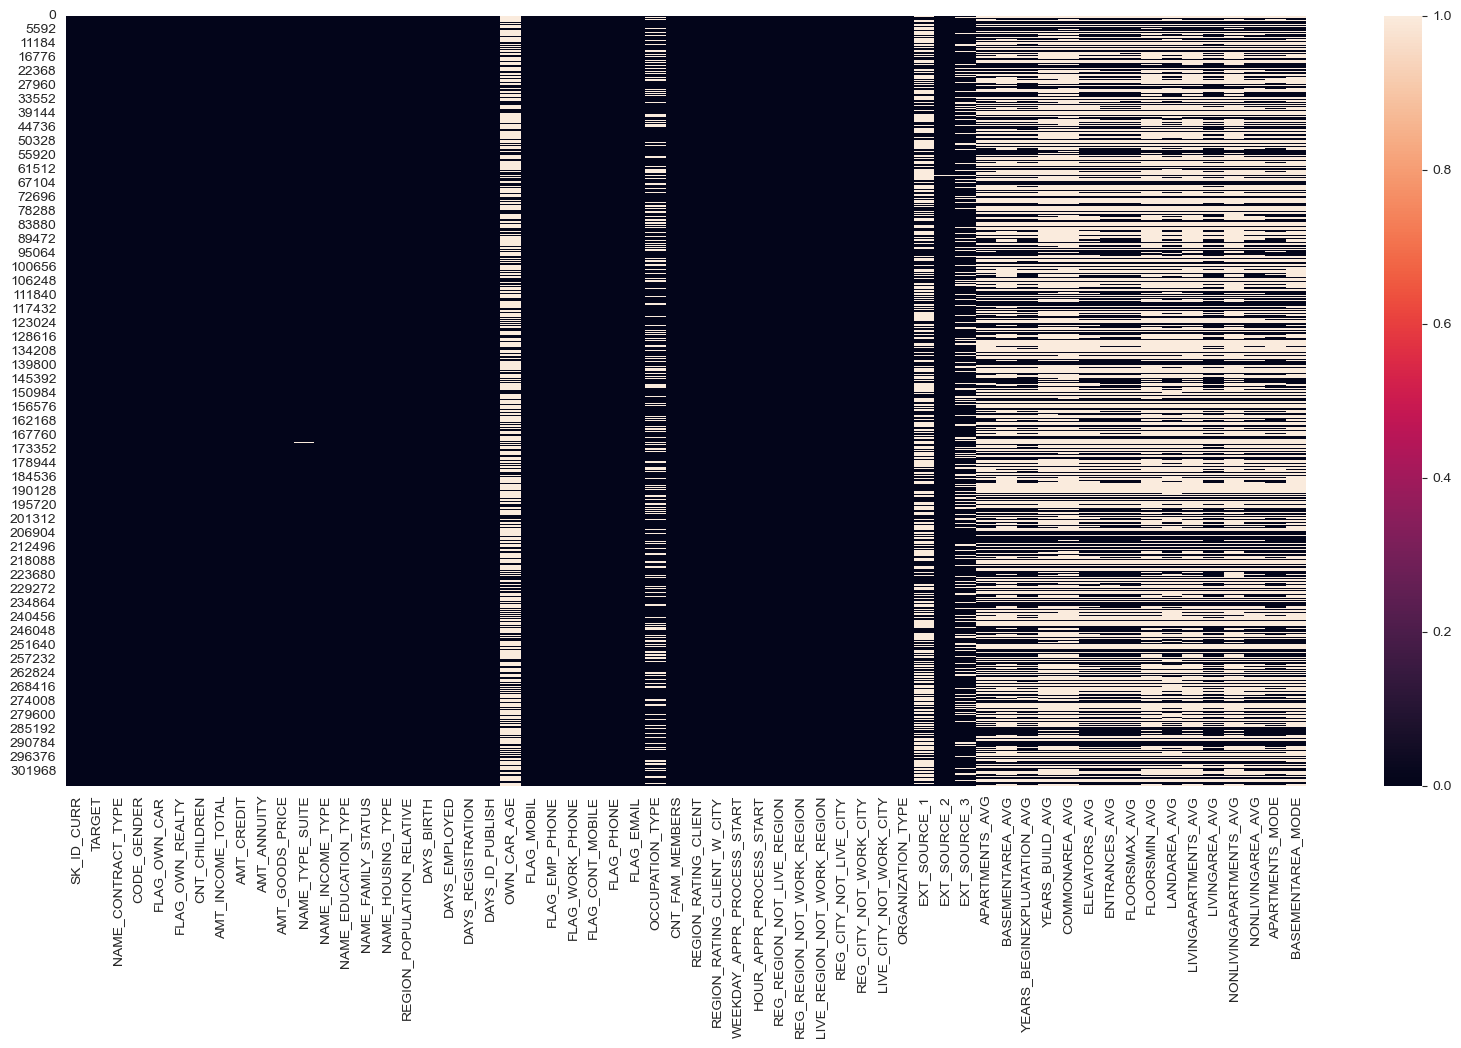

In [211]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_application.loc[:, 'SK_ID_CURR':'BASEMENTAREA_MODE'].isnull())
plt.show()

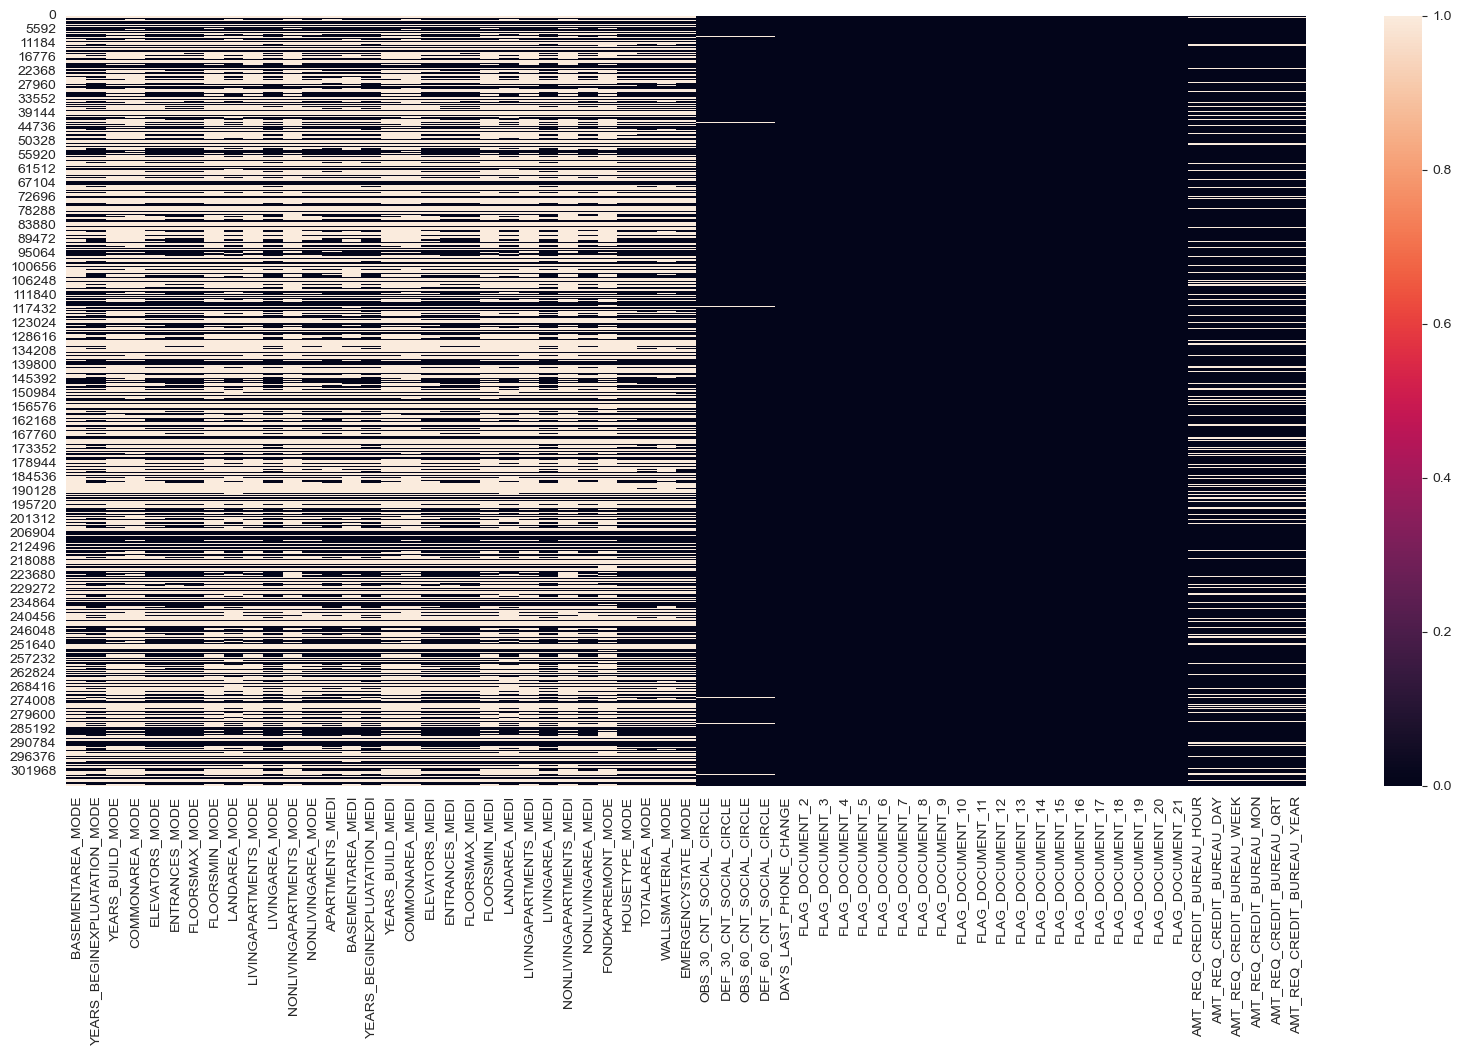

In [212]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_application.loc[:, 'BASEMENTAREA_MODE':].isnull())
plt.show()

### Target
Our target will be the `TARGET` variable that stands for:

- **1** : client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample
- **0** : all other cases)

In [213]:
df_application['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

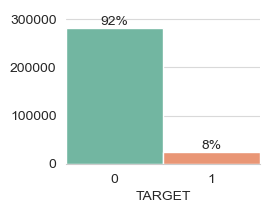

In [214]:
fig, ax = plt.subplots(figsize=(2.5,2))
sns.countplot(df_application, x='TARGET', ax=ax, width=1)

ax.bar_label(
    ax.containers[0], fmt=lambda x: '{:.0f}%'.format(
        x/df_application.shape[0]*100), fontsize=10
)
sns.set_style('whitegrid', {'grid.linewidth': 0, 'grid.color': '.95'})
sns.despine(left=True)
ax.set_ylim(0, 320000)

plt.ylabel(ylabel=None)
plt.show()

We can observe an imbalanced distributin of the target variable, we will have to handle it in the modelling part.

In [215]:
# convert target to string for vizualization only purpose
df_application['TARGET'] = df_application['TARGET'].astype(str)

## Personal information
The dataset contains some personal details as gender, age, family members, etc, let's have a look at common patterns.

### Gender

In [216]:
df_application['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

We see a `XNA` values thats stands for a null value, as explained by the competitiion hosts: 
*"Value 365243 denotes infinity in DAYS variables in the datasets, therefore you can consider them NA values. Also XNA/XAP denote NA values.""*

In [217]:
df_application = df_application.loc[df_application['CODE_GENDER'] != 'XNA', :]

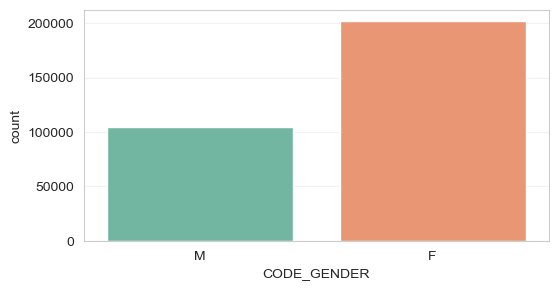

In [218]:
plt.figure(figsize=(6,3))
sns.countplot(df_application, x='CODE_GENDER')

plt.show()

We get almost 2 times more female applicants, let's check how the gender relates to target:

In [219]:
df_application.groupby(['CODE_GENDER','TARGET'])['SK_ID_CURR'].nunique()

CODE_GENDER  TARGET
F            0         188278
             1          14170
M            0          94404
             1          10655
Name: SK_ID_CURR, dtype: int64

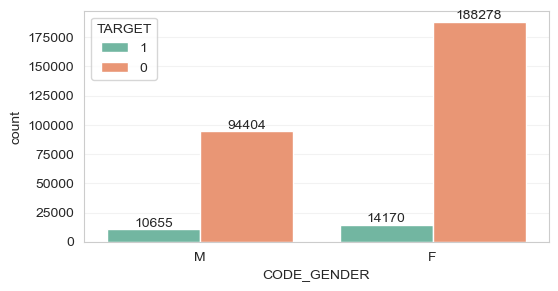

In [220]:
plt.figure(figsize=(6,3))
ax = sns.countplot(df_application, x='CODE_GENDER', hue="TARGET")

for container in ax.containers:
    ax.bar_label(container)
plt.show()

The number of female applications with the target 1 (having difficulties) is slightly higher than for male clients, however, if considered proportionnaly to the total number of clients of boths genders, we get 11% of men and 7.5% for women.

### Age

In [221]:
df_application['AGE'] = round(-1 * df_application['DAYS_BIRTH'] / 365)
df_application[['DAYS_BIRTH', 'AGE']]

DAYS_BIRTH     AGE
0            -9461 26.0000
1           -16765 46.0000
2           -19046 52.0000
3           -19005 52.0000
4           -19932 55.0000
...            ...     ...
307506       -9327 26.0000
307507      -20775 57.0000
307508      -14966 41.0000
307509      -11961 33.0000
307510      -16856 46.0000

[307507 rows x 2 columns]

In [222]:
df_application['AGE'].describe()

count   307507.0000
mean        43.9387
std         11.9640
min         21.0000
25%         34.0000
50%         43.0000
75%         54.0000
max         69.0000
Name: AGE, dtype: float64

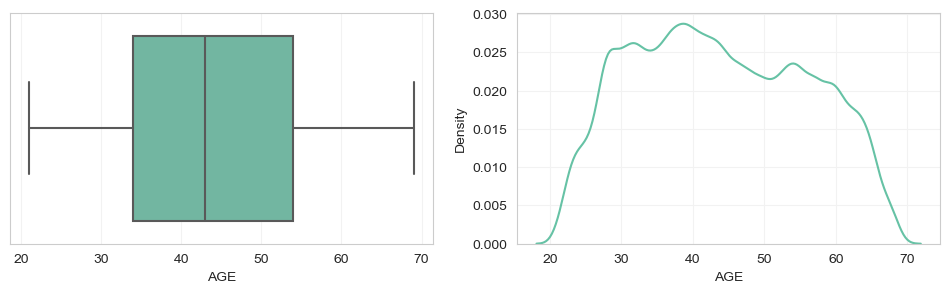

In [223]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
sns.boxplot(data = df_application, x = 'AGE', ax = ax1)
sns.kdeplot(x = df_application['AGE'], ax = ax2)
plt.show()

The mean and median age is 43 years old.

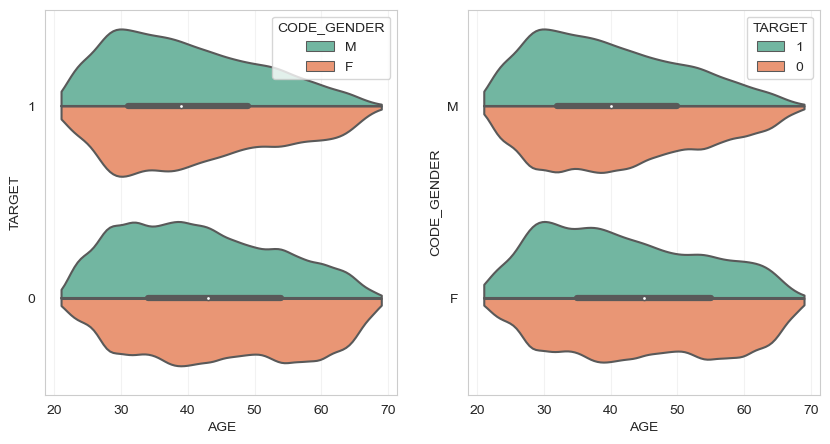

In [224]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.violinplot(
    data=df_application, x="AGE", y="TARGET", hue="CODE_GENDER", cut=0, split=True, ax=ax1
)

sns.violinplot(
    data=df_application, x="AGE", y="CODE_GENDER", hue="TARGET", cut=0, split=True, ax=ax2
)

plt.show()

Interesting insights:
- more women than men after 60 years old with payment difficulties
- more women than men without payment difficulties after 60 years old
- around 30-years old (both F and M) have more payment difficulties than other age ranges
- women in their 30-40 are more likely to have financial issues than in 50-60

### Family

In [225]:
df_application['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

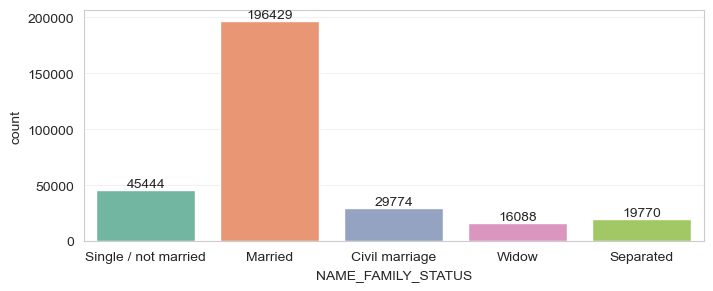

In [226]:
df_application = df_application.loc[df_application['NAME_FAMILY_STATUS'] != 'Unknown', :]

plt.figure(figsize=(8,3))
ax = sns.countplot(df_application, x='NAME_FAMILY_STATUS')
ax.bar_label(ax.containers[0])

plt.show()

([<matplotlib.patches.Wedge at 0x30a659bb0>,
 [Text(-0.46454872554451915, 0.9970930155180926, 'Married'),
  Text(-0.25561647092968093, -1.0698879473054437, 'Single / not married'),
  Text(0.559816376107119, -0.9468926153700287, 'Civil marriage'),
  Text(0.9486977857311627, -0.5567517501982272, 'Separated'),
  Text(1.085175354972941, -0.17998457978213456, 'Widow')],
 [Text(-0.253390213933374, 0.5438689175553232, '64%'),
  Text(-0.13942716596164414, -0.5835752439847874, '15%'),
  Text(0.3053543869675194, -0.5164868811109247, '10%'),
  Text(0.517471519489725, -0.30368277283539663, '6%'),
  Text(0.5919138299852404, -0.09817340715389157, '5%')])

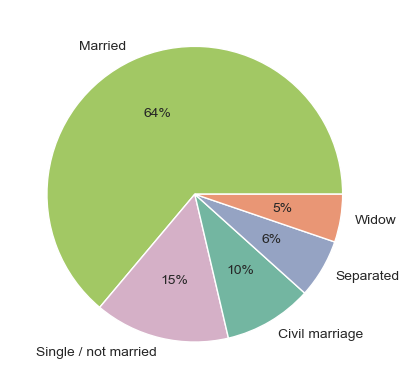

In [227]:
plt.pie(
    df_application['NAME_FAMILY_STATUS'].value_counts().values,
    labels=df_application['NAME_FAMILY_STATUS'].value_counts().index,
    autopct='%.0f%%',
    colors=['#A2C864', '#D5B0C7', '#73B6A1', '#95A3C3', '#E99675'],
    textprops={'size': 10})

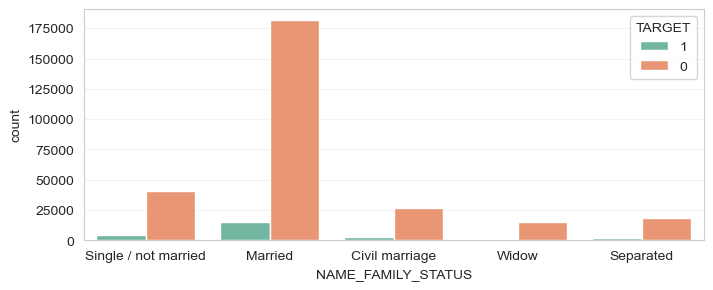

In [228]:
plt.figure(figsize=(8,3))
ax = sns.countplot(df_application, x='NAME_FAMILY_STATUS', hue="TARGET")

plt.show()

Not surprisingly, married persons represent the most part of applicants.

In [229]:
df_application['CNT_CHILDREN'].describe()

count   307505.0000
mean         0.4171
std          0.7221
min          0.0000
25%          0.0000
50%          0.0000
75%          1.0000
max         19.0000
Name: CNT_CHILDREN, dtype: float64

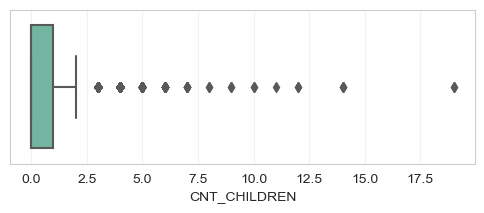

In [230]:
plt.figure(figsize=(6, 2))
sns.boxplot(data = df_application, x = 'CNT_CHILDREN')
plt.show()

75% of clients do not have children.

In [231]:
df_application['cnt_non_child'] = df_application['CNT_FAM_MEMBERS'] - df_application['CNT_CHILDREN']
df_application['child_to_non_child_ratio'] = df_application['CNT_CHILDREN'] / df_application['cnt_non_child']
df_application['income_per_non_child'] = df_application['AMT_INCOME_TOTAL'] / df_application['cnt_non_child']
df_application['credit_per_person'] = df_application['AMT_CREDIT'] / df_application['CNT_FAM_MEMBERS']
df_application['credit_per_child'] = df_application['AMT_CREDIT'] / (1 + df_application['CNT_CHILDREN'])
df_application['credit_per_non_child'] = df_application['AMT_CREDIT'] / df_application['cnt_non_child']

In [232]:
family_features = ['cnt_non_child',
                 'child_to_non_child_ratio',
                 'income_per_non_child',
                 'credit_per_person',
                 'credit_per_child',
                 'credit_per_non_child']

family_corr = abs(df_application[family_features + ['TARGET']].corr())
family_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                     1.0000
credit_per_child           0.0335
credit_per_person          0.0235
child_to_non_child_ratio   0.0209
credit_per_non_child       0.0202
cnt_non_child              0.0122
income_per_non_child       0.0019
Name: TARGET, dtype: float64

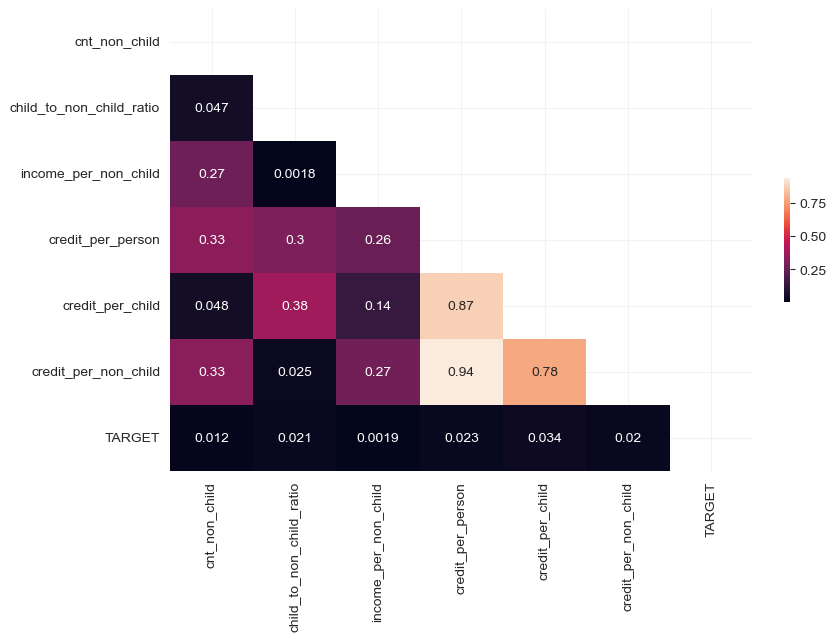

In [233]:
mask = np.zeros_like(family_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8, 6))
X_eng_corr_heatmap = sns.heatmap(family_corr,
                           cbar_kws={'fraction': 0.01},
                           annot=True,
                           mask=mask
                           )
plt.yticks(rotation=0)
X_eng_corr_heatmap.set(xlabel="", ylabel="")
plt.show()

### Education

In [234]:
df_application['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218389
Higher education                  74861
Incomplete higher                 10276
Lower secondary                    3815
Academic degree                     164
Name: count, dtype: int64

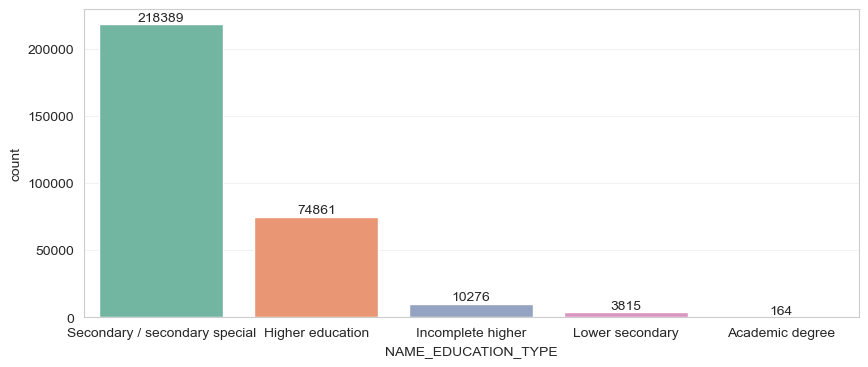

In [235]:
plt.figure(figsize=(10,4))
ax = sns.countplot(df_application, x='NAME_EDUCATION_TYPE')
ax.bar_label(ax.containers[0])

plt.show()

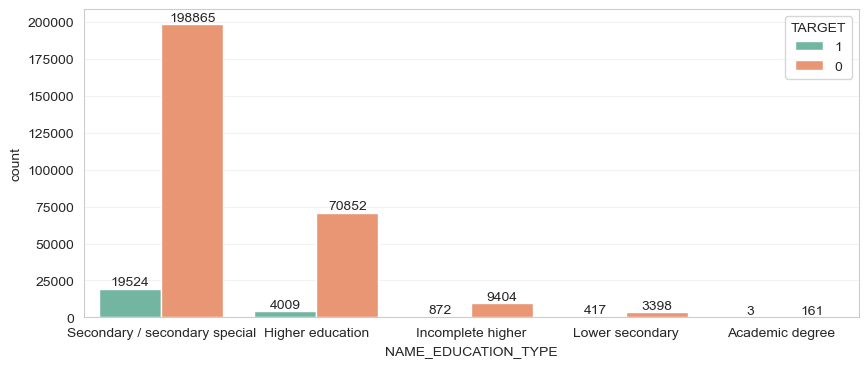

In [236]:
plt.figure(figsize=(10,4))
ax = sns.countplot(df_application, x='NAME_EDUCATION_TYPE', hue='TARGET')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

### Property

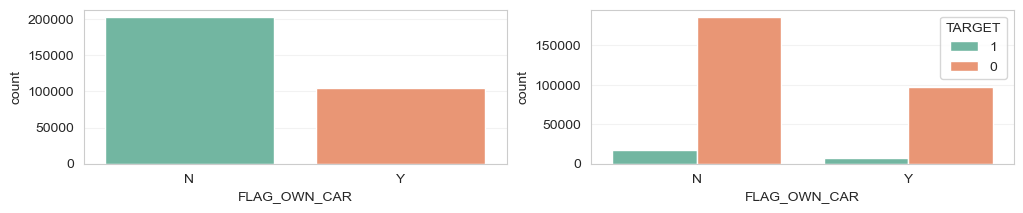

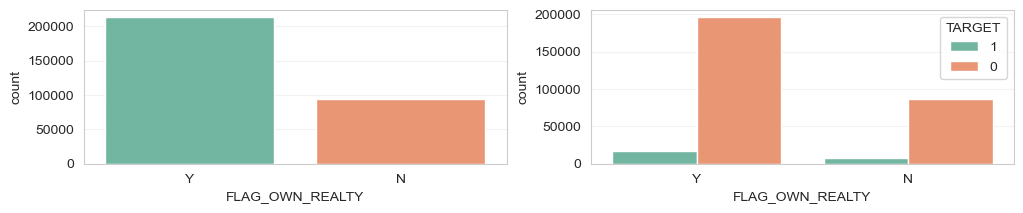

In [237]:
possessions = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

for index, feature in enumerate(possessions):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,2))
    sns.countplot(df_application, x=feature, ax=ax1)
    sns.countplot(df_application, x=feature, hue='TARGET', ax=ax2)
    plt.show()

## Income & credit

### Contract type

In [238]:
df_application['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29273
Name: count, dtype: int64

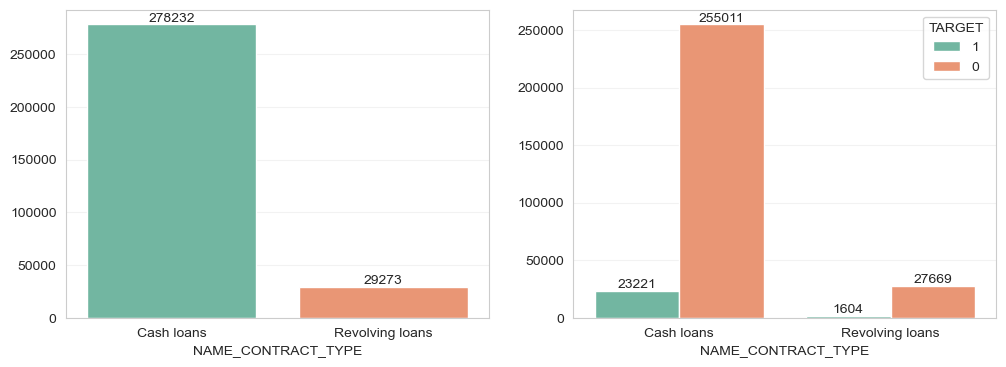

In [239]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.countplot(df_application, x='NAME_CONTRACT_TYPE', ax=ax1)
ax1.set(ylabel=None)
sns.countplot(df_application, x='NAME_CONTRACT_TYPE', hue='TARGET', ax=ax2)
ax2.set(ylabel=None)

for container in ax1.containers:
    ax1.bar_label(container)

for container in ax2.containers:
    ax2.bar_label(container)
    
plt.show()

### Num features

___________________
 
AMT_ANNUITY
___________________
 
count   307493.0000
mean     27108.6382
std      14493.8401
min       1615.5000
25%      16524.0000
50%      24903.0000
75%      34596.0000
max     258025.5000
Name: AMT_ANNUITY, dtype: float64


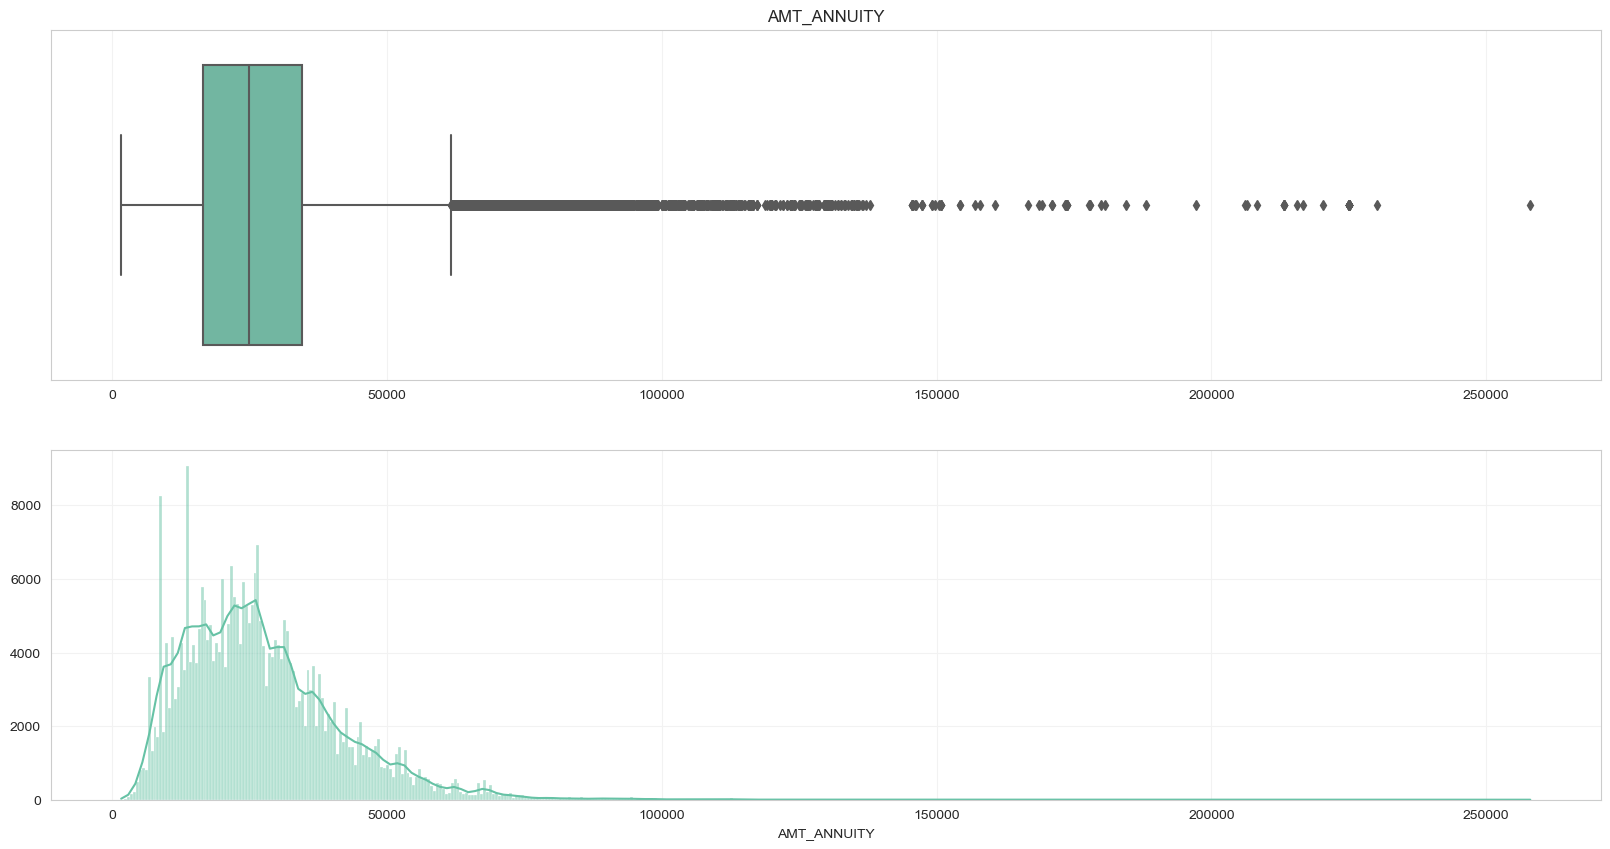

 
___________________
 
AMT_INCOME_TOTAL
___________________
 
count      307505.0000
mean       168796.6617
std        237124.8484
min         25650.0000
25%        112500.0000
50%        147150.0000
75%        202500.0000
max     117000000.0000
Name: AMT_INCOME_TOTAL, dtype: float64


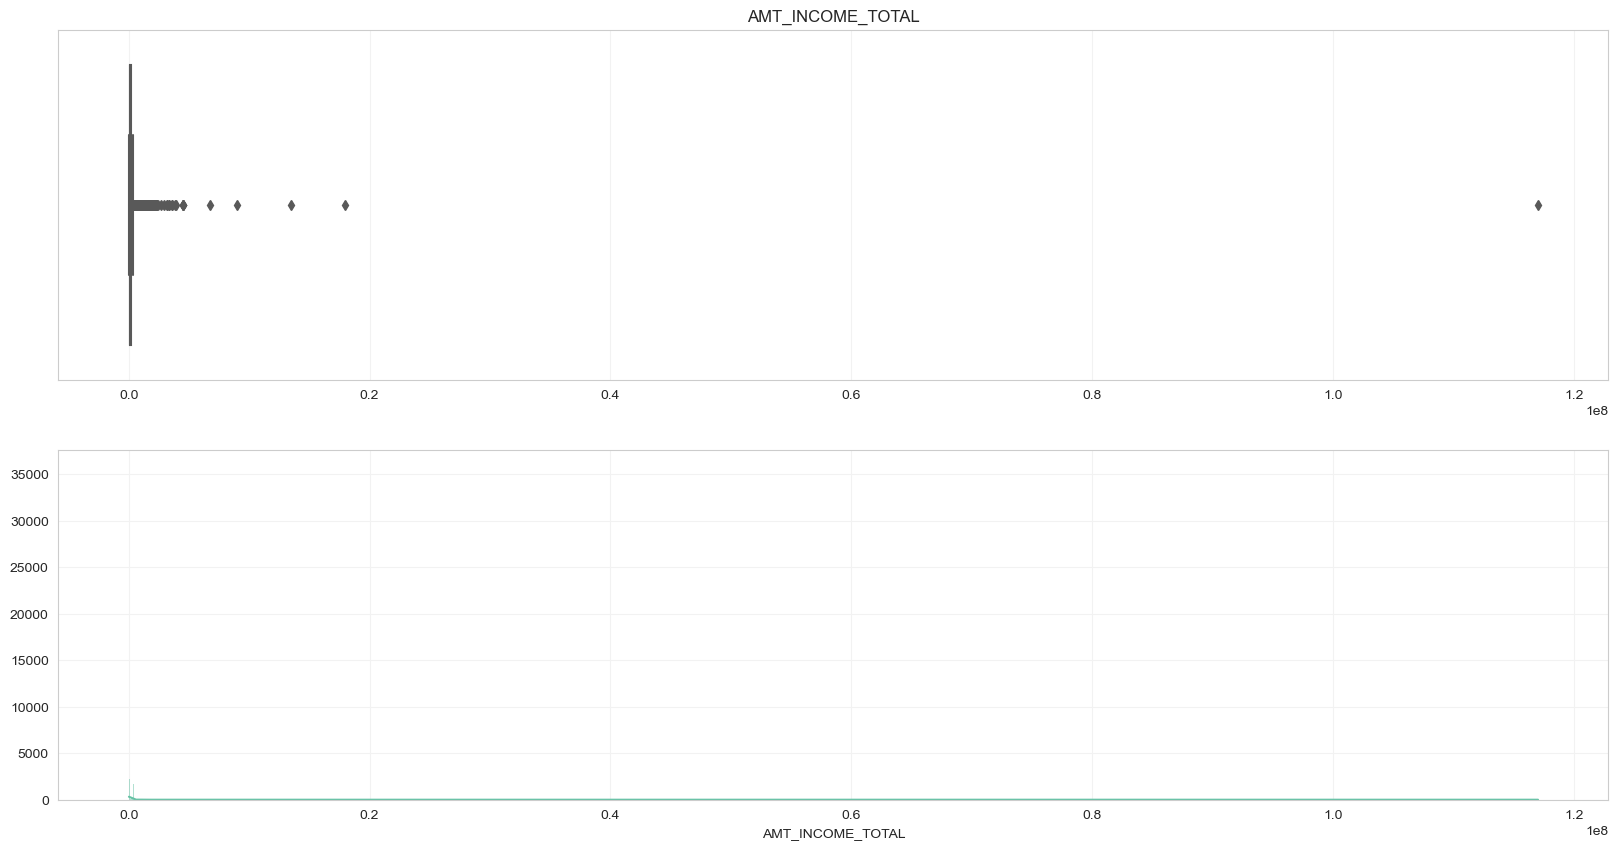

 
___________________
 
AMT_CREDIT
___________________
 
count    307505.0000
mean     599028.3953
std      402493.8866
min       45000.0000
25%      270000.0000
50%      513531.0000
75%      808650.0000
max     4050000.0000
Name: AMT_CREDIT, dtype: float64


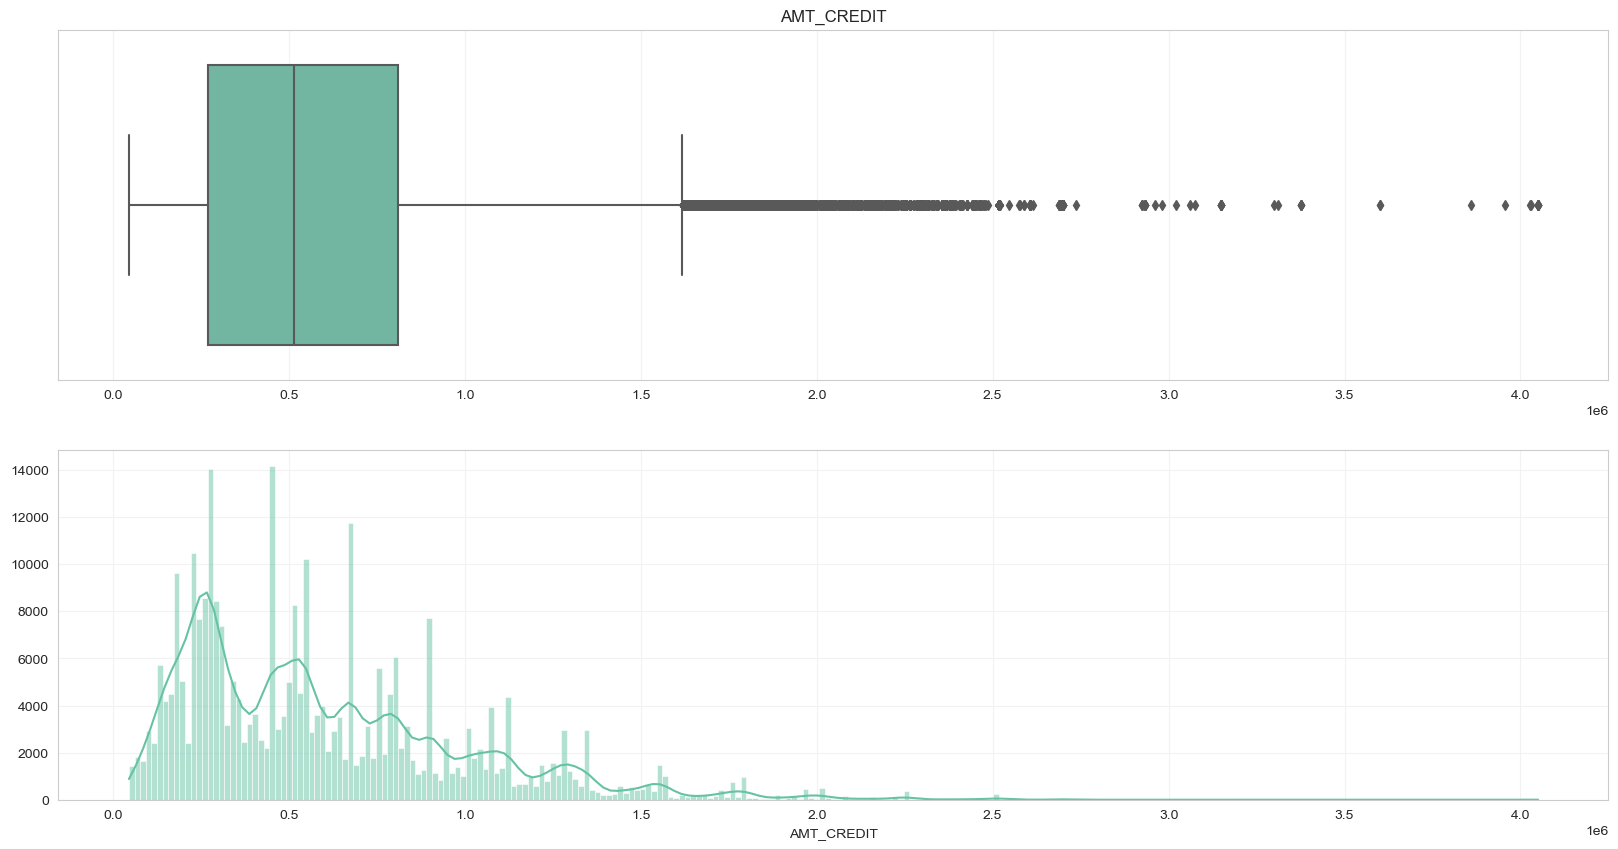

In [240]:
credit_features = [
    'AMT_ANNUITY', # Loan annuity
    'AMT_INCOME_TOTAL', # Income of the client
    'AMT_CREDIT', # Credit amount of the loan
]

for feature in credit_features:
    print('___________________')
    print(' ')
    print(feature)
    print('___________________')
    print(' ')
    
    print(df_application[feature].describe())
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
    
    sns.boxplot(x=df_application[feature], ax=ax1)
    ax1.set(xlabel=None)
    ax1.set_title(feature)
    
    sns.histplot(x=df_application[feature], kde=True, ax=ax2)
    ax2.set(ylabel=None)
    
    plt.show()
    
    print(' ')

In [241]:
credit_corr = abs(df_application[credit_features + ['TARGET']].corr())
credit_corr

AMT_ANNUITY  AMT_INCOME_TOTAL  AMT_CREDIT  TARGET
AMT_ANNUITY            1.0000            0.1917      0.7701  0.0128
AMT_INCOME_TOTAL       0.1917            1.0000      0.1569  0.0040
AMT_CREDIT             0.7701            0.1569      1.0000  0.0304
TARGET                 0.0128            0.0040      0.0304  1.0000

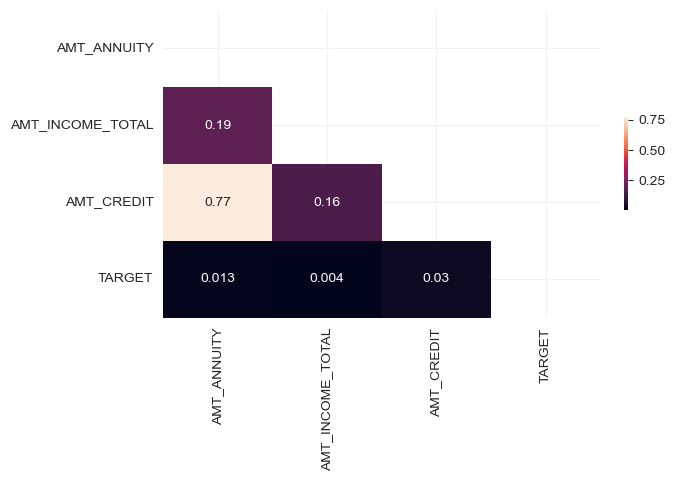

In [242]:
mask = np.zeros_like(credit_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(6, 4))
X_eng_corr_heatmap = sns.heatmap(credit_corr,
                           cbar_kws={'fraction': 0.01},
                           annot=True,
                           mask=mask
                           )
plt.yticks(rotation=0)
X_eng_corr_heatmap.set(xlabel="", ylabel="")
plt.show()

We see a correlation between 'AMT_CREDIT' (Credit amount of the loan) and 'AMT_ANNUITY' (loan annuity) which seems logical because the amount of annuity is based on the amount of the loan.

### Engineered features

In [243]:
df_application['DAYS_EMPLOYED_PERC'] = df_application['DAYS_EMPLOYED'] / df_application['DAYS_BIRTH']
df_application['INCOME_CREDIT_PERC'] = df_application['AMT_INCOME_TOTAL'] / df_application['AMT_CREDIT']
df_application['INCOME_PER_PERSON'] = df_application['AMT_INCOME_TOTAL'] / df_application['CNT_FAM_MEMBERS']
df_application['INCOME_PER_CHILD'] = df_application['AMT_INCOME_TOTAL'] / (1 + df_application['CNT_CHILDREN'])
df_application['ANNUITY_INCOME_PERC'] = df_application['AMT_ANNUITY'] / df_application['AMT_INCOME_TOTAL']
df_application['PAYMENT_RATE'] = df_application['AMT_ANNUITY'] / df_application['AMT_CREDIT']
df_application['CHILDREN_RATIO'] = df_application['CNT_CHILDREN'] / df_application['CNT_FAM_MEMBERS']

In [244]:
engineered_credit_features = [
    'DAYS_EMPLOYED_PERC',
    'INCOME_CREDIT_PERC',
    'INCOME_PER_PERSON',
    'INCOME_PER_CHILD',
    'ANNUITY_INCOME_PERC',
    'PAYMENT_RATE',
    'CHILDREN_RATIO'
]

In [245]:
X_eng = df_application[engineered_credit_features + ['TARGET']]
X_eng_corr = abs(X_eng.corr())

In [246]:
X_eng_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                1.0000
DAYS_EMPLOYED_PERC    0.0422
CHILDREN_RATIO        0.0212
ANNUITY_INCOME_PERC   0.0143
PAYMENT_RATE          0.0127
INCOME_PER_CHILD      0.0125
INCOME_PER_PERSON     0.0066
INCOME_CREDIT_PERC    0.0018
Name: TARGET, dtype: float64

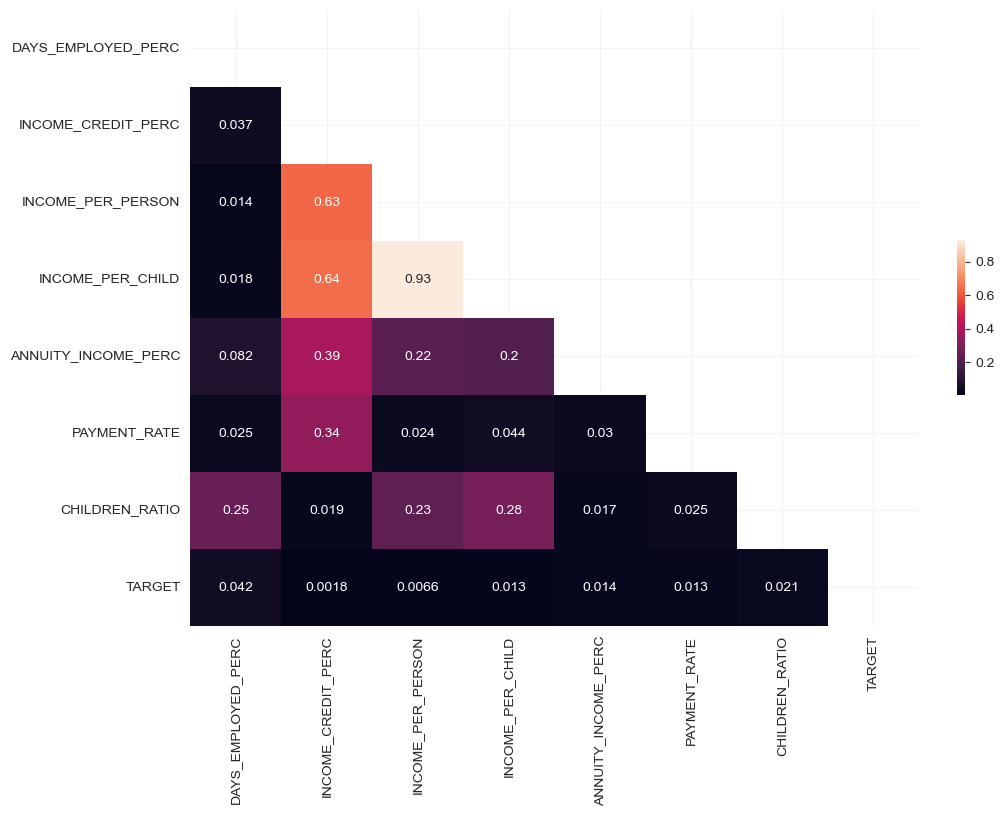

In [247]:
mask = np.zeros_like(X_eng_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 8))
X_eng_corr_heatmap = sns.heatmap(X_eng_corr,
                           cbar_kws={'fraction': 0.01},
                           annot=True,
                           mask=mask
                           )
plt.yticks(rotation=0)
X_eng_corr_heatmap.set(xlabel="", ylabel="")
plt.show()

## Employment

In [248]:
df_application['DAYS_EMPLOYED'].describe()

count   307505.0000
mean     63816.3488
std     141276.8361
min     -17912.0000
25%      -2760.0000
50%      -1213.0000
75%       -289.0000
max     365243.0000
Name: DAYS_EMPLOYED, dtype: float64

In [249]:
df_application['DAYS_EMPLOYED'] = df_application['DAYS_EMPLOYED'].replace(365243,np.nan)
df_application['DAYS_EMPLOYED'].describe()

count   252131.0000
mean     -2384.1556
std       2338.3317
min     -17912.0000
25%      -3175.0000
50%      -1648.0000
75%       -767.0000
max          0.0000
Name: DAYS_EMPLOYED, dtype: float64

In [250]:
df_application_clean = df_application.loc[df_application['DAYS_EMPLOYED'].notnull(), :]
df_application_clean.shape

(252131, 136)

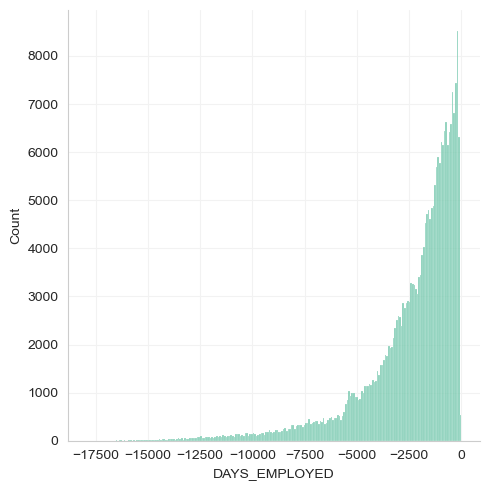

In [251]:
sns.displot(df_application['DAYS_EMPLOYED'])

In [252]:
def display_distribution(df):
    binary_features = df.columns[df.isin([0,1]).all()]
    
    numerical_features = df.drop(columns = ['SK_ID_CURR'], axis=1, errors='ignore').select_dtypes(['int64', 'float64']).columns
    numerical_features = [col for col in numerical_features if col not in binary_features]
    print(len(numerical_features))

    rows = math.ceil(len(numerical_features)/3)
    fig = plt.figure(figsize=(24, rows*2))

    for index, feature in enumerate (numerical_features):
        ax = fig.add_subplot(rows, 3, (index+1))
        sns.boxplot(df, x=feature)
        ax.set_title(feature, fontsize=14)
        ax.set(xlabel=None)

    plt.subplots_adjust(hspace=1)
    plt.show()

86


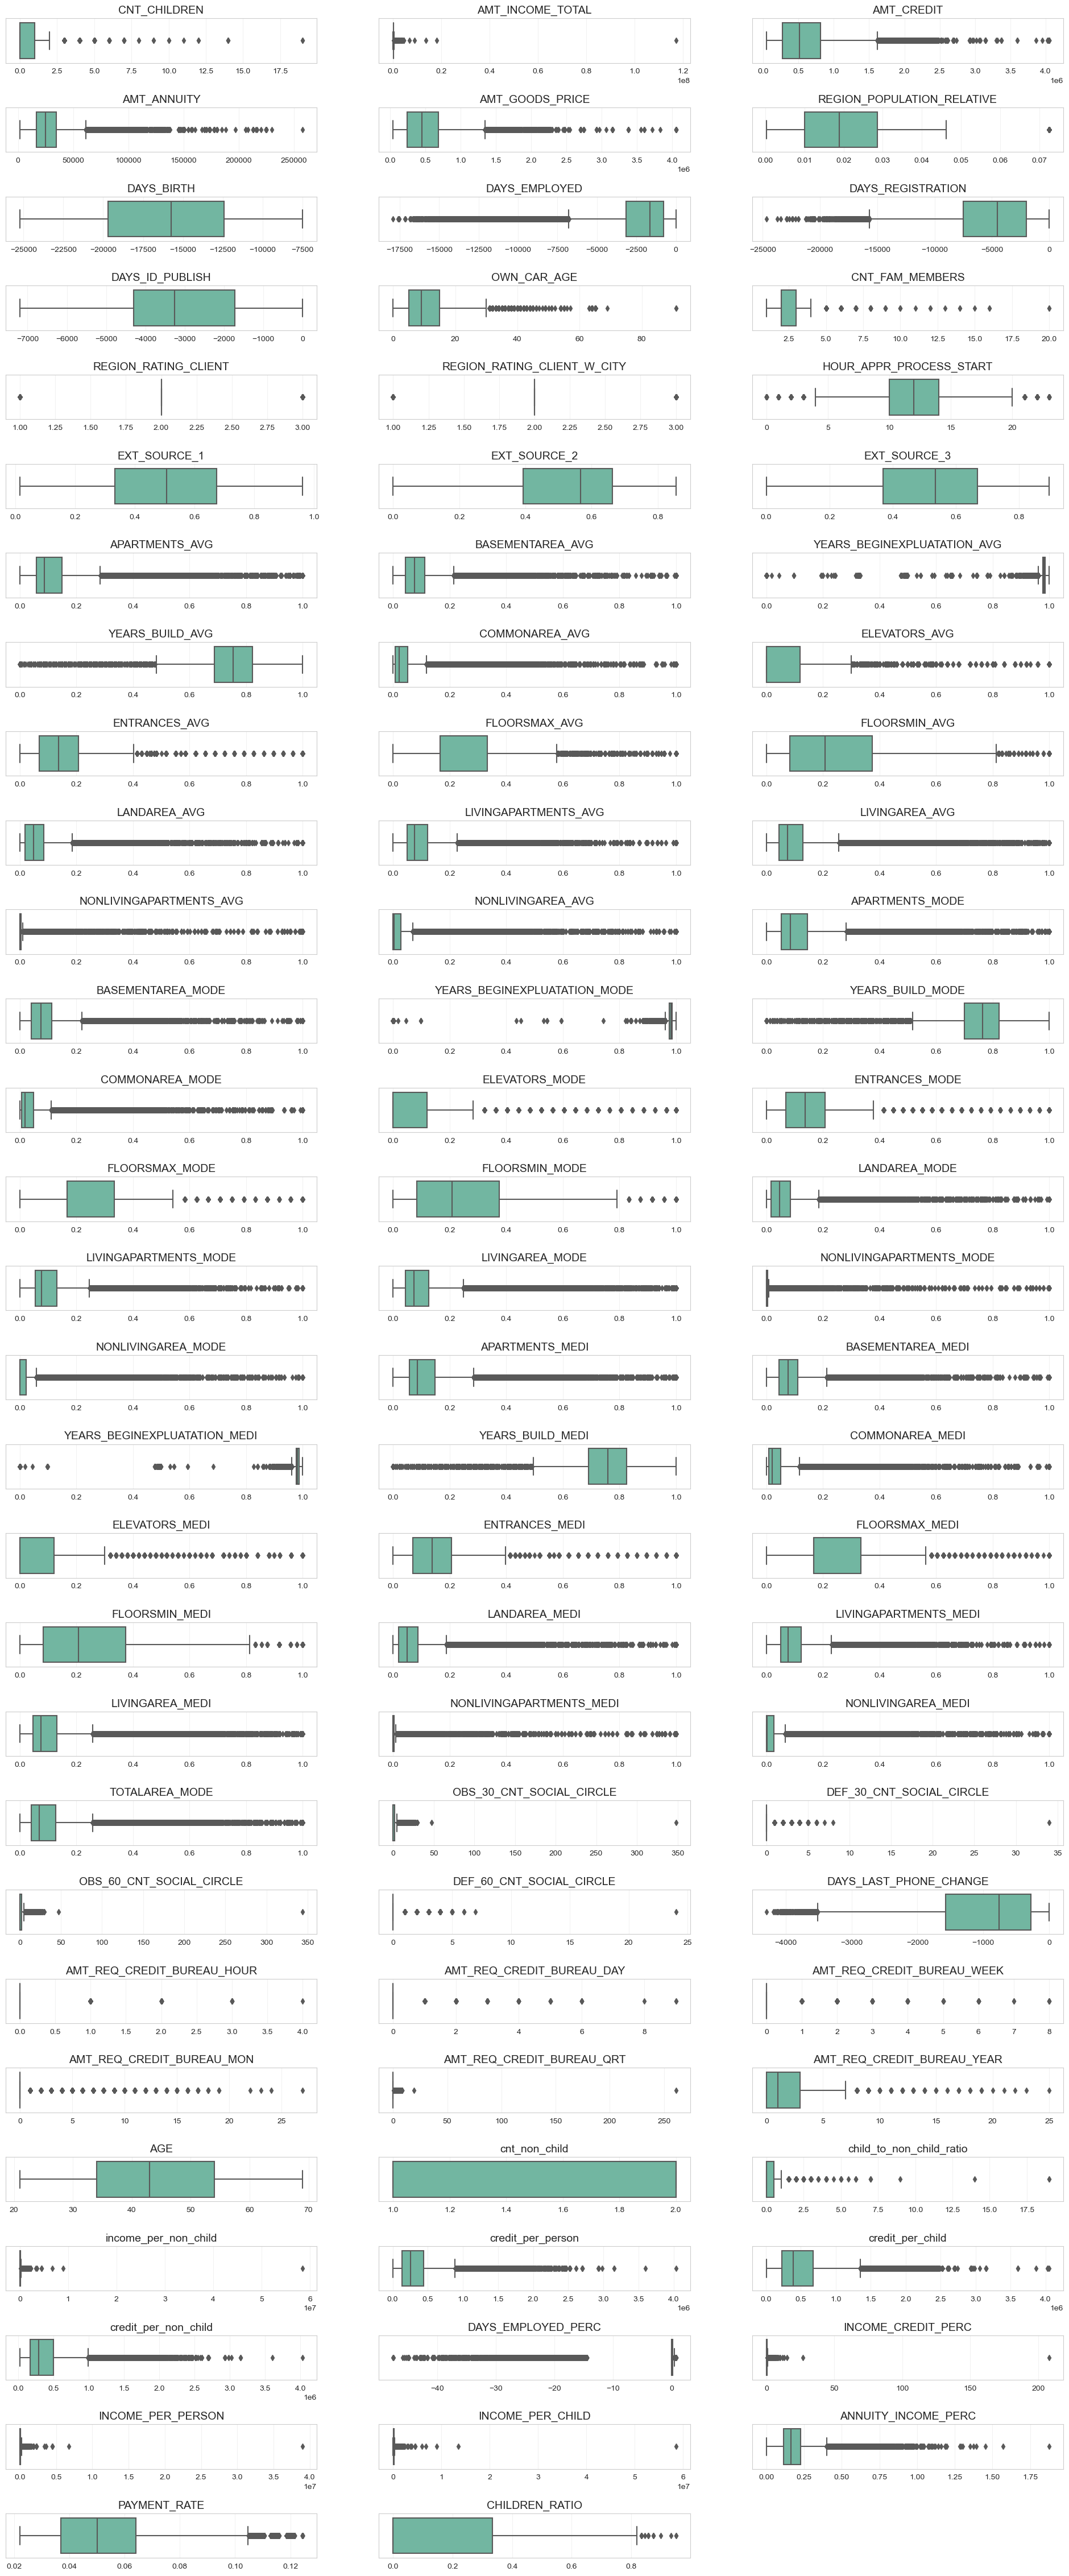

In [253]:
display_distribution(df_application)

# Previous application

All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.

In [254]:
df_prev_app = pd.read_csv('./data/source/previous_application.csv')
df_prev_app.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans    1730.4300       17145.0000   
1     2802425      108129         Cash loans   25188.6150      607500.0000   
2     2523466      122040         Cash loans   15060.7350      112500.0000   
3     2819243      176158         Cash loans   47041.3350      450000.0000   
4     1784265      202054         Cash loans   31924.3950      337500.0000   
5     1383531      199383         Cash loans   23703.9300      315000.0000   
6     2315218      175704         Cash loans          NaN           0.0000   
7     1656711      296299         Cash loans          NaN           0.0000   
8     2367563      342292         Cash loans          NaN           0.0000   
9     2579447      334349         Cash loans          NaN           0.0000   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.0000            0.0000       17145.0000                   SATURDAY   
1 679671.0000               NaN      607500.0000                   THURSDAY   
2 136444.5000               NaN      112500.0000                    TUESDAY   
3 470790.0000               NaN      450000.0000                     MONDAY   
4 404055.0000               NaN      337500.0000                   THURSDAY   
5 340573.5000               NaN      315000.0000                   SATURDAY   
6      0.0000               NaN              NaN                    TUESDAY   
7      0.0000               NaN              NaN                     MONDAY   
8      0.0000               NaN              NaN                     MONDAY   
9      0.0000               NaN              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity      12.0000   
1                       11  ...                  XNA      36.0000   
2                       11  ...                  XNA      12.0000   
3                        7  ...                  XNA      12.0000   
4                        9  ...                  XNA      24.0000   
5                        8  ...                  XNA      18.0000   
6                       11  ...                  XNA          NaN   
7                        7  ...                  XNA          NaN   
8                       15  ...                  XNA          NaN   
9                       15  ...                  XNA          NaN   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest         365243.0000   
1        low_action          Cash X-Sell: low         365243.0000   
2              high         Cash X-Sell: high         365243.0000   
3            middle       Cash X-Sell: middle         365243.0000   
4              high         Cash Street: high                 NaN   
5        low_normal          Cash X-Sell: low         365243.0000   
6               XNA                      Cash                 NaN   
7               XNA                      Cash                 NaN   
8               XNA                      Cash                 NaN   
9               XNA                      Cash                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0       -42.0000                  300.0000       -42.0000         -37.0000   
1      -134.0000                  916.0000    365243.0000      365243.0000   
2      -271.0000                   59.0000    365243.0000      365243.0000   
3      -482.0000                 -152.0000      -182.0000        -177.0000   
4            NaN                       NaN            NaN              NaN   
5      -654.0000                 -144.0000      -144.0000        -137.0000   
6            NaN                       NaN            NaN              NaN   
7            NaN                       NaN            NaN              NaN   
8            NaN                       NaN          

In [255]:
df_prev_app.shape

(1670214, 37)

In [256]:
df_prev_app.info(show_counts = True, verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Number of prev applications

In [257]:
nb_prev_app = df_prev_app.groupby('SK_ID_CURR')['SK_ID_PREV'].nunique().reset_index()
nb_prev_app.shape

(338857, 2)

In [258]:
nb_prev_app.head(10)

SK_ID_CURR  SK_ID_PREV
0      100001           1
1      100002           1
2      100003           3
3      100004           1
4      100005           2
5      100006           9
6      100007           6
7      100008           5
8      100009           7
9      100010           1

In [259]:
nb_prev_app = nb_prev_app.rename(columns={'SK_ID_PREV': 'nb_prev_app'})
nb_prev_app.head(5)

SK_ID_CURR  nb_prev_app
0      100001            1
1      100002            1
2      100003            3
3      100004            1
4      100005            2

In [260]:
df_application = df_application.merge(nb_prev_app, on=['SK_ID_CURR'], how='left')
df_application.shape

(307505, 137)

Fill missing previous applications with 0

In [261]:
df_application['nb_prev_app'] = df_application['nb_prev_app'].fillna(0)

In [262]:
df_application['nb_prev_app'].describe()

count   307505.0000
mean         4.5971
std          4.1798
min          0.0000
25%          2.0000
50%          3.0000
75%          6.0000
max         73.0000
Name: nb_prev_app, dtype: float64

<Axes: xlabel='nb_prev_app', ylabel='Density'>

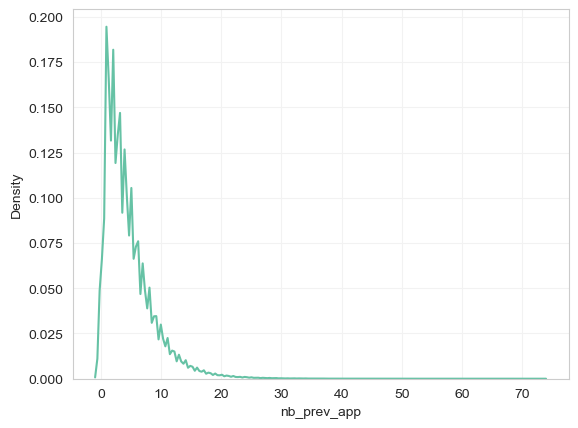

In [263]:
sns.kdeplot(x=df_application['nb_prev_app'])

In [264]:
df_application[['nb_prev_app', 'TARGET']].corr()

nb_prev_app  TARGET
nb_prev_app       1.0000  0.0235
TARGET            0.0235  1.0000

We can see that 50% of customers do not have a very rich credit history (3 applications)

## Categorical features

In [265]:
cat_prev_app = df_prev_app.select_dtypes(['object']).columns
cat_prev_app

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [266]:
df_prev_app[cat_prev_app].nunique()

NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64

In [267]:
def display_categorical(df, features, nb_columns=2):
    rows = math.ceil(len(categories_to_display)/nb_columns)
    fig = plt.figure(figsize=(20, rows*5))
    
    
    for index, feature in enumerate (features):
        ax = fig.add_subplot(rows, 2, (index+1))
        sns.countplot(df, x=feature, ax=ax)
        ax.bar_label(
            ax.containers[0], fmt=lambda x: '{:.0f}%'.format(
                x/df.shape[0]*100), fontsize=10
        )
        ax.set_title(feature, fontsize=14)
        ax.set(xlabel=None)
        ax.set(ylabel=None)
    
    plt.subplots_adjust(hspace=1)
    plt.show()

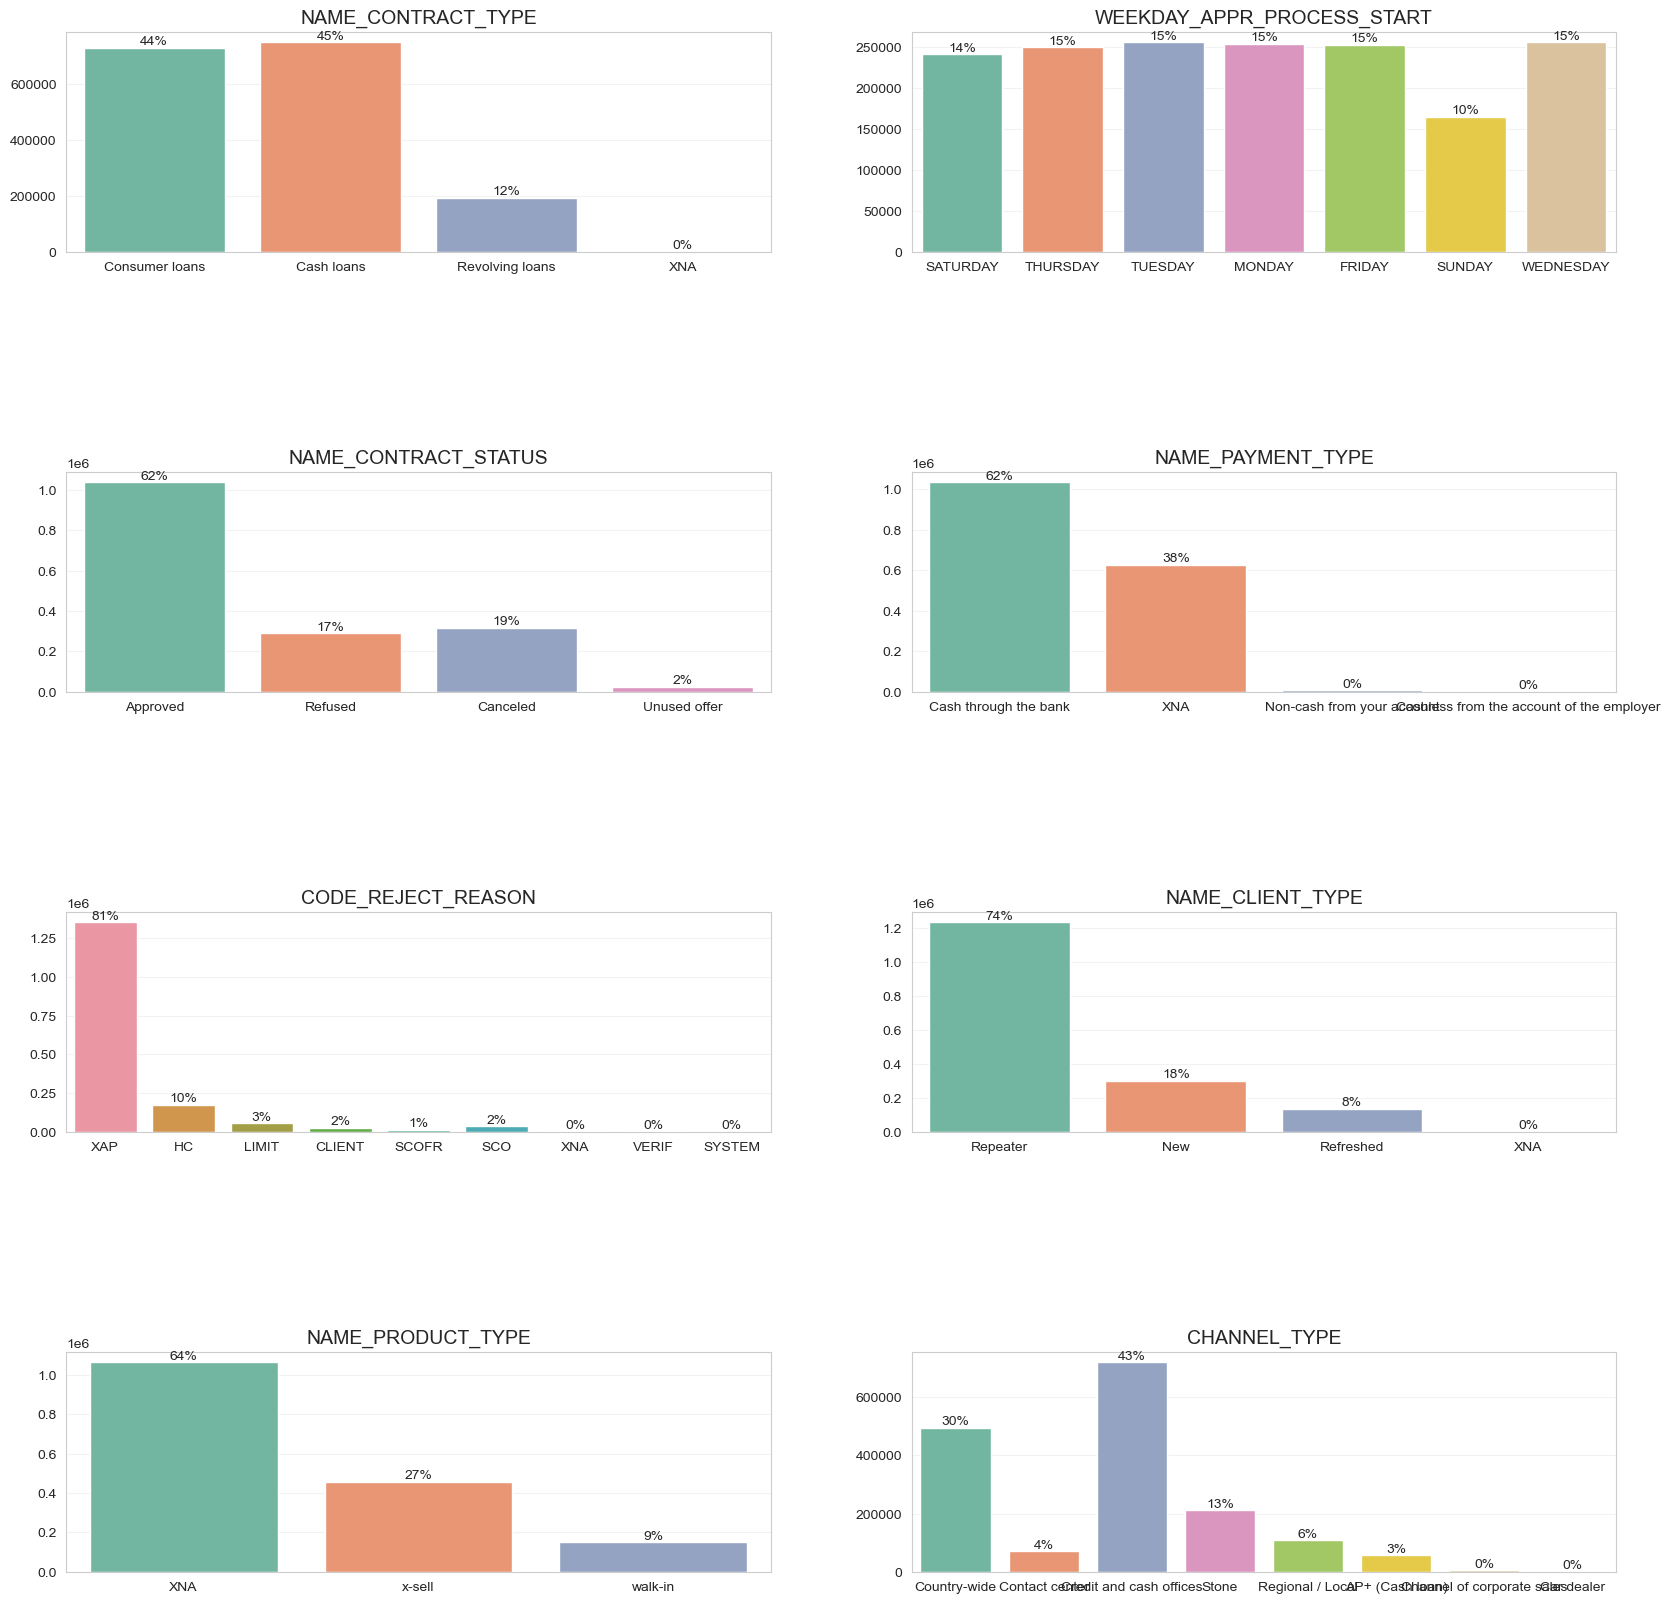

In [268]:
categories_to_display = [
    'NAME_CONTRACT_TYPE', 
    'WEEKDAY_APPR_PROCESS_START', 
    'NAME_CONTRACT_STATUS',
    'NAME_PAYMENT_TYPE',
    'CODE_REJECT_REASON',
    'NAME_CLIENT_TYPE',
    'NAME_PRODUCT_TYPE',
    'CHANNEL_TYPE'
]

display_categorical(df_prev_app, categories_to_display)

## Aggregated features

Build an array of tuples (feature_name, agg_type) for the following features:
- `AMT_ANNUITY`: Annuity of previous application
- `AMT_APPLICATION`: For how much credit did client ask on the previous application
- `AMT_CREDIT`: Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT
- `AMT_DOWN_PAYMENT`: Down payment on the previous application
- `AMT_GOODS_PRICE`: Goods price of good that client asked for (if applicable) on the previous application
- `CNT_PAYMENT`: Term of previous credit at application of the previous application
- `DAYS_DECISION`: Relative to current application when was the decision about previous application made
- `RATE_DOWN_PAYMENT`: Down payment rate normalized on previous credit
                   

In [269]:
agg_recipies = []

features_to_agg = [
    'AMT_ANNUITY', 
    'AMT_APPLICATION', 
    'AMT_CREDIT',
    'AMT_DOWN_PAYMENT',
    'AMT_GOODS_PRICE',
    'HOUR_APPR_PROCESS_START',
    'CNT_PAYMENT',
    'DAYS_DECISION',
    'RATE_DOWN_PAYMENT'
    ]

for agg in ['mean', 'min', 'max', 'sum', 'var']:
    for feature in features_to_agg:
        agg_recipies.append((feature, agg))

agg_recipies

[('AMT_ANNUITY', 'mean'),
 ('AMT_APPLICATION', 'mean'),
 ('AMT_CREDIT', 'mean'),
 ('AMT_DOWN_PAYMENT', 'mean'),
 ('AMT_GOODS_PRICE', 'mean'),
 ('HOUR_APPR_PROCESS_START', 'mean'),
 ('CNT_PAYMENT', 'mean'),
 ('DAYS_DECISION', 'mean'),
 ('RATE_DOWN_PAYMENT', 'mean'),
 ('AMT_ANNUITY', 'min'),
 ('AMT_APPLICATION', 'min'),
 ('AMT_CREDIT', 'min'),
 ('AMT_DOWN_PAYMENT', 'min'),
 ('AMT_GOODS_PRICE', 'min'),
 ('HOUR_APPR_PROCESS_START', 'min'),
 ('CNT_PAYMENT', 'min'),
 ('DAYS_DECISION', 'min'),
 ('RATE_DOWN_PAYMENT', 'min'),
 ('AMT_ANNUITY', 'max'),
 ('AMT_APPLICATION', 'max'),
 ('AMT_CREDIT', 'max'),
 ('AMT_DOWN_PAYMENT', 'max'),
 ('AMT_GOODS_PRICE', 'max'),
 ('HOUR_APPR_PROCESS_START', 'max'),
 ('CNT_PAYMENT', 'max'),
 ('DAYS_DECISION', 'max'),
 ('RATE_DOWN_PAYMENT', 'max'),
 ('AMT_ANNUITY', 'sum'),
 ('AMT_APPLICATION', 'sum'),
 ('AMT_CREDIT', 'sum'),
 ('AMT_DOWN_PAYMENT', 'sum'),
 ('AMT_GOODS_PRICE', 'sum'),
 ('HOUR_APPR_PROCESS_START', 'sum'),
 ('CNT_PAYMENT', 'sum'),
 ('DAYS_DECISION', 's

Add the `SK_ID_CURR` to group by current id

In [270]:
agg_recipies = [(['SK_ID_CURR'], agg_recipies)]
agg_recipies

[(['SK_ID_CURR'],
  [('AMT_ANNUITY', 'mean'),
   ('AMT_APPLICATION', 'mean'),
   ('AMT_CREDIT', 'mean'),
   ('AMT_DOWN_PAYMENT', 'mean'),
   ('AMT_GOODS_PRICE', 'mean'),
   ('HOUR_APPR_PROCESS_START', 'mean'),
   ('CNT_PAYMENT', 'mean'),
   ('DAYS_DECISION', 'mean'),
   ('RATE_DOWN_PAYMENT', 'mean'),
   ('AMT_ANNUITY', 'min'),
   ('AMT_APPLICATION', 'min'),
   ('AMT_CREDIT', 'min'),
   ('AMT_DOWN_PAYMENT', 'min'),
   ('AMT_GOODS_PRICE', 'min'),
   ('HOUR_APPR_PROCESS_START', 'min'),
   ('CNT_PAYMENT', 'min'),
   ('DAYS_DECISION', 'min'),
   ('RATE_DOWN_PAYMENT', 'min'),
   ('AMT_ANNUITY', 'max'),
   ('AMT_APPLICATION', 'max'),
   ('AMT_CREDIT', 'max'),
   ('AMT_DOWN_PAYMENT', 'max'),
   ('AMT_GOODS_PRICE', 'max'),
   ('HOUR_APPR_PROCESS_START', 'max'),
   ('CNT_PAYMENT', 'max'),
   ('DAYS_DECISION', 'max'),
   ('RATE_DOWN_PAYMENT', 'max'),
   ('AMT_ANNUITY', 'sum'),
   ('AMT_APPLICATION', 'sum'),
   ('AMT_CREDIT', 'sum'),
   ('AMT_DOWN_PAYMENT', 'sum'),
   ('AMT_GOODS_PRICE', 'sum'),
 

In [271]:
groupby_agg_names = []

for groupby_col, recipies in tqdm.tqdm(agg_recipies):
    group_object = df_prev_app.groupby(groupby_col)
    
    for feature, agg_func in tqdm.tqdm(recipies):
        groupby_agg_name = '{}_{}_{}'.format('PREV_APP', feature, agg_func)
        df_application = df_application.merge(group_object[feature]
                              .agg(agg_func)
                              .reset_index()
                              .rename(index=str,
                                      columns={feature: groupby_agg_name})
                              [groupby_col + [groupby_agg_name]],
                              on=groupby_col,
                              how='left')
        groupby_agg_names.append(groupby_agg_name)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

In [272]:
groupby_agg_names

['PREV_APP_AMT_ANNUITY_mean',
 'PREV_APP_AMT_APPLICATION_mean',
 'PREV_APP_AMT_CREDIT_mean',
 'PREV_APP_AMT_DOWN_PAYMENT_mean',
 'PREV_APP_AMT_GOODS_PRICE_mean',
 'PREV_APP_HOUR_APPR_PROCESS_START_mean',
 'PREV_APP_CNT_PAYMENT_mean',
 'PREV_APP_DAYS_DECISION_mean',
 'PREV_APP_RATE_DOWN_PAYMENT_mean',
 'PREV_APP_AMT_ANNUITY_min',
 'PREV_APP_AMT_APPLICATION_min',
 'PREV_APP_AMT_CREDIT_min',
 'PREV_APP_AMT_DOWN_PAYMENT_min',
 'PREV_APP_AMT_GOODS_PRICE_min',
 'PREV_APP_HOUR_APPR_PROCESS_START_min',
 'PREV_APP_CNT_PAYMENT_min',
 'PREV_APP_DAYS_DECISION_min',
 'PREV_APP_RATE_DOWN_PAYMENT_min',
 'PREV_APP_AMT_ANNUITY_max',
 'PREV_APP_AMT_APPLICATION_max',
 'PREV_APP_AMT_CREDIT_max',
 'PREV_APP_AMT_DOWN_PAYMENT_max',
 'PREV_APP_AMT_GOODS_PRICE_max',
 'PREV_APP_HOUR_APPR_PROCESS_START_max',
 'PREV_APP_CNT_PAYMENT_max',
 'PREV_APP_DAYS_DECISION_max',
 'PREV_APP_RATE_DOWN_PAYMENT_max',
 'PREV_APP_AMT_ANNUITY_sum',
 'PREV_APP_AMT_APPLICATION_sum',
 'PREV_APP_AMT_CREDIT_sum',
 'PREV_APP_AMT_DOWN_PA

In [273]:
df_application.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307505 entries, 0 to 307504
Data columns (total 182 columns):
 #    Column                                 Non-Null Count   Dtype  
---   ------                                 --------------   -----  
 0    SK_ID_CURR                             307505 non-null  int64  
 1    TARGET                                 307505 non-null  object 
 2    NAME_CONTRACT_TYPE                     307505 non-null  object 
 3    CODE_GENDER                            307505 non-null  object 
 4    FLAG_OWN_CAR                           307505 non-null  object 
 5    FLAG_OWN_REALTY                        307505 non-null  object 
 6    CNT_CHILDREN                           307505 non-null  int64  
 7    AMT_INCOME_TOTAL                       307505 non-null  float64
 8    AMT_CREDIT                             307505 non-null  float64
 9    AMT_ANNUITY                            307493 non-null  float64
 10   AMT_GOODS_PRICE                        307

In [274]:
app_agg_corr = abs(df_application[groupby_agg_names + ['TARGET']].corr())
app_agg_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                                  1.0000
PREV_APP_DAYS_DECISION_min              0.0534
PREV_APP_DAYS_DECISION_var              0.0485
PREV_APP_DAYS_DECISION_mean             0.0469
PREV_APP_CNT_PAYMENT_var                0.0420
PREV_APP_RATE_DOWN_PAYMENT_sum          0.0417
PREV_APP_RATE_DOWN_PAYMENT_max          0.0401
PREV_APP_HOUR_APPR_PROCESS_START_mean   0.0359
PREV_APP_AMT_ANNUITY_mean               0.0349
PREV_APP_RATE_DOWN_PAYMENT_mean         0.0336
PREV_APP_AMT_ANNUITY_min                0.0323
PREV_APP_HOUR_APPR_PROCESS_START_min    0.0314
PREV_APP_HOUR_APPR_PROCESS_START_max    0.0308
PREV_APP_CNT_PAYMENT_max                0.0294
PREV_APP_AMT_ANNUITY_max                0.0290
PREV_APP_CNT_PAYMENT_mean               0.0277
PREV_APP_CNT_PAYMENT_sum                0.0277
PREV_APP_AMT_DOWN_PAYMENT_sum           0.0270
PREV_APP_AMT_DOWN_PAYMENT_max           0.0253
PREV_APP_AMT_DOWN_PAYMENT_mean          0.0246
PREV_APP_RATE_DOWN_PAYMENT_var          0.0226
PREV_APP_AMT_

45


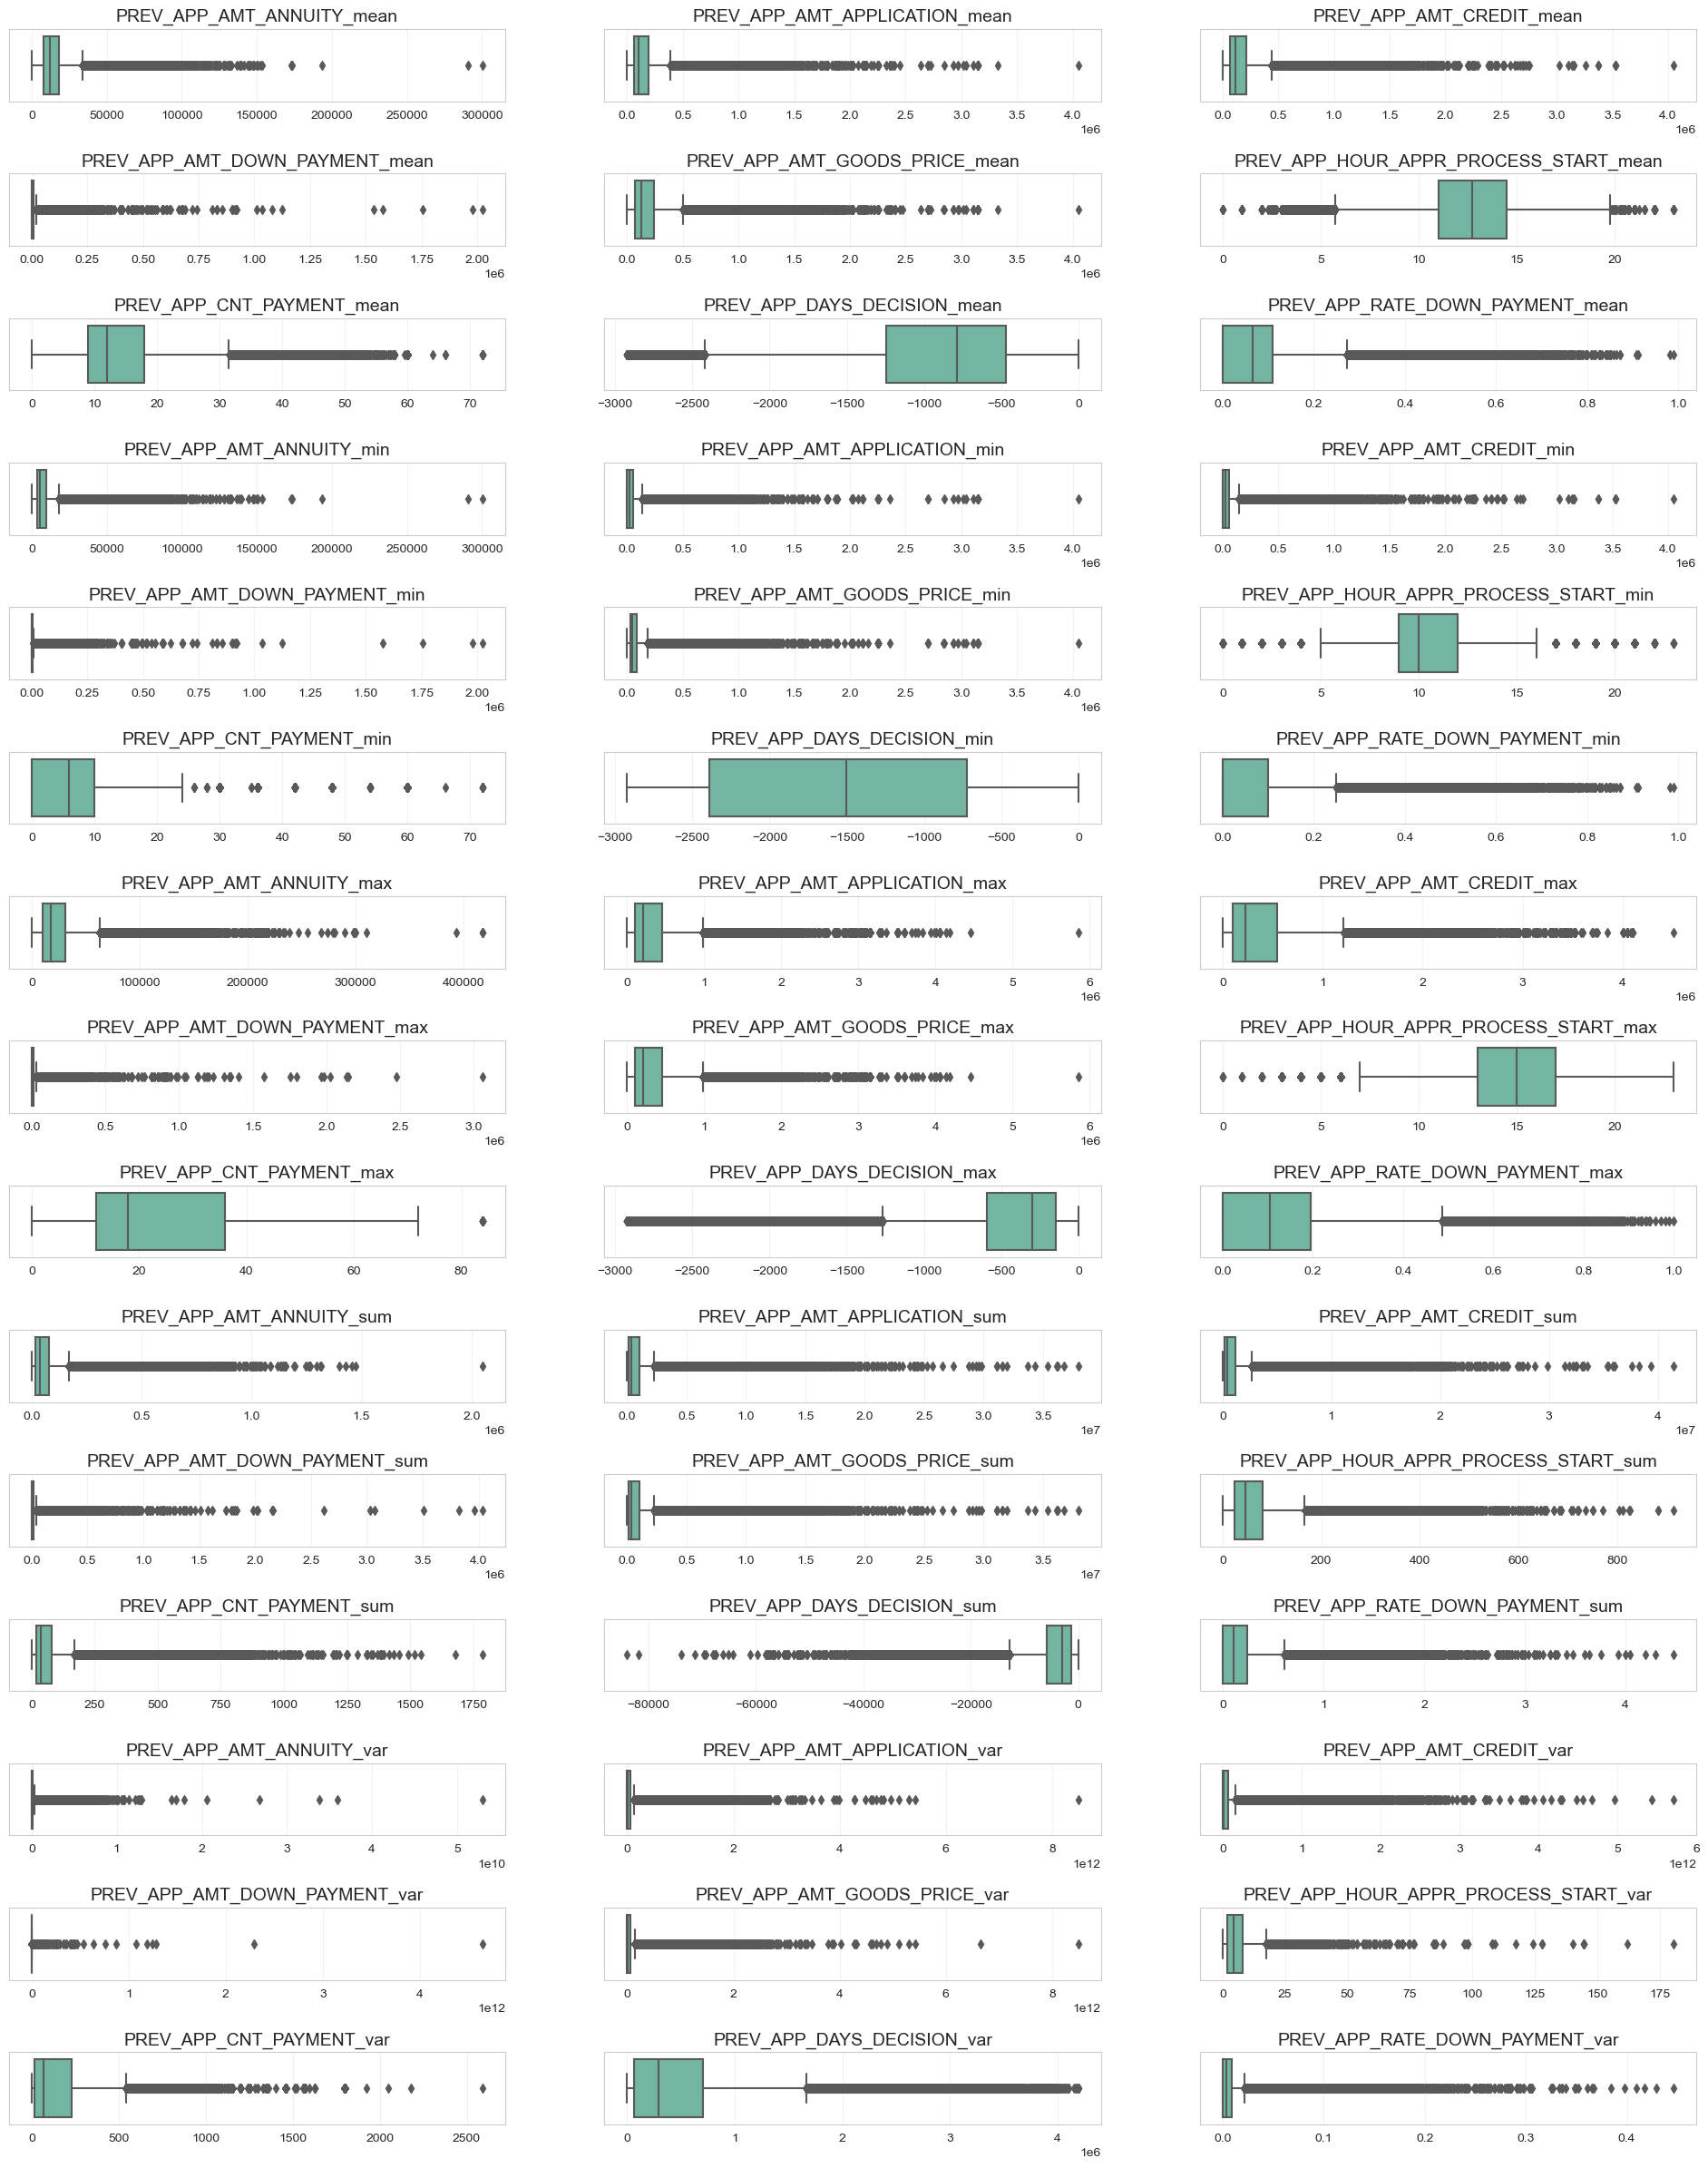

In [275]:
display_distribution(df_application[groupby_agg_names])

# Bureau

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).

For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

In [276]:
df_bureau = pd.read_csv('./data/source/bureau.csv')
df_bureau.head(10)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   
5      215354       5714467        Active      currency 1         -273   
6      215354       5714468        Active      currency 1          -43   
7      162297       5714469        Closed      currency 1        -1896   
8      162297       5714470        Closed      currency 1        -1146   
9      162297       5714471        Active      currency 1        -1146   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0            -153.0000          -153.0000   
1                   0            1075.0000                NaN   
2                   0             528.0000                NaN   
3                   0                  NaN                NaN   
4                   0            1197.0000                NaN   
5                   0           27460.0000                NaN   
6                   0              79.0000                NaN   
7                   0           -1684.0000         -1710.0000   
8                   0            -811.0000          -840.0000   
9                   0            -484.0000                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0      91323.0000   
1                     NaN                   0     225000.0000   
2                     NaN                   0     464323.5000   
3                     NaN                   0      90000.0000   
4              77674.5000                   0    2700000.0000   
5                  0.0000                   0     180000.0000   
6                  0.0000                   0      42103.8000   
7              14985.0000                   0      76878.4500   
8                  0.0000                   0     103007.7000   
9                  0.0000                   0       4500.0000   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0               0.0000                   NaN                  0.0000   
1          171342.0000                   NaN                  0.0000   
2                  NaN                   NaN                  0.0000   
3                  NaN                   NaN                  0.0000   
4                  NaN                   NaN                  0.0000   
5           71017.3800           108982.6200                  0.0000   
6           42103.8000                0.0000                  0.0000   
7               0.0000                0.0000                  0.0000   
8               0.0000                0.0000                  0.0000   
9               0.0000                0.0000                  0.0000   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN  
5      Credit card                 -31          NaN  
6  Consumer credit                 -22          NaN  
7  Consumer credit               -1710          NaN  
8  Consumer credit                -840          NaN  
9      Credit card                -690          NaN

In [277]:
df_bureau.shape

(1716428, 17)

In [278]:
df_bureau.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1716428 non-null  int64  
 1   SK_ID_BUREAU            1716428 non-null  int64  
 2   CREDIT_ACTIVE           1716428 non-null  object 
 3   CREDIT_CURRENCY         1716428 non-null  object 
 4   DAYS_CREDIT             1716428 non-null  int64  
 5   CREDIT_DAY_OVERDUE      1716428 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     1610875 non-null  float64
 7   DAYS_ENDDATE_FACT       1082775 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  591940 non-null   float64
 9   CNT_CREDIT_PROLONG      1716428 non-null  int64  
 10  AMT_CREDIT_SUM          1716415 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     1458759 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    1124648 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  1716428 non-null  float64
 14  CR

## Number of prev credits

In [279]:
nb_prev_credits = df_bureau.groupby('SK_ID_CURR')['SK_ID_BUREAU'].nunique().reset_index()
nb_prev_credits = nb_prev_credits.rename(columns={'SK_ID_BUREAU': 'nb_prev_credits'})
print(nb_prev_credits.shape)
nb_prev_credits.head(5)

(305811, 2)


SK_ID_CURR  nb_prev_credits
0      100001                7
1      100002                8
2      100003                4
3      100004                2
4      100005                3

In [280]:
df_application = df_application.merge(nb_prev_credits, on=['SK_ID_CURR'], how='left')
df_application.shape

(307505, 183)

In [281]:
df_application['nb_prev_credits'] = df_application['nb_prev_credits'].fillna(0)

In [282]:
df_application['nb_prev_credits'].describe()

count   307505.0000
mean         4.7651
std          4.4962
min          0.0000
25%          1.0000
50%          4.0000
75%          7.0000
max        116.0000
Name: nb_prev_credits, dtype: float64

<Axes: xlabel='nb_prev_credits', ylabel='Density'>

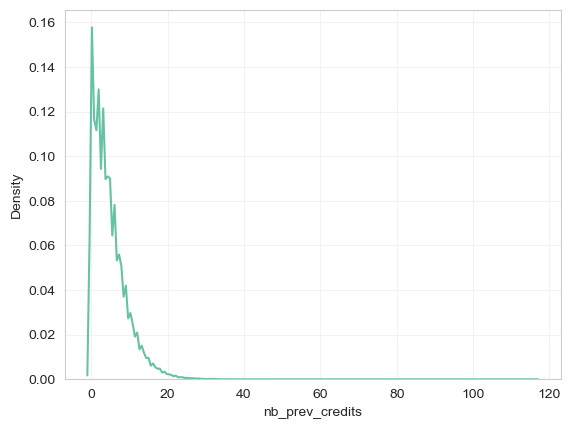

In [283]:
sns.kdeplot(x=df_application['nb_prev_credits'])

In [284]:
df_application[['nb_prev_credits', 'TARGET']].corr()

nb_prev_credits  TARGET
nb_prev_credits           1.0000 -0.0100
TARGET                   -0.0100  1.0000

## Categorical features

In [285]:
cat_bureau = df_bureau.select_dtypes(['object']).columns
cat_bureau

Index(['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE'], dtype='object')

In [286]:
df_bureau[cat_bureau].nunique()

CREDIT_ACTIVE       4
CREDIT_CURRENCY     4
CREDIT_TYPE        15
dtype: int64

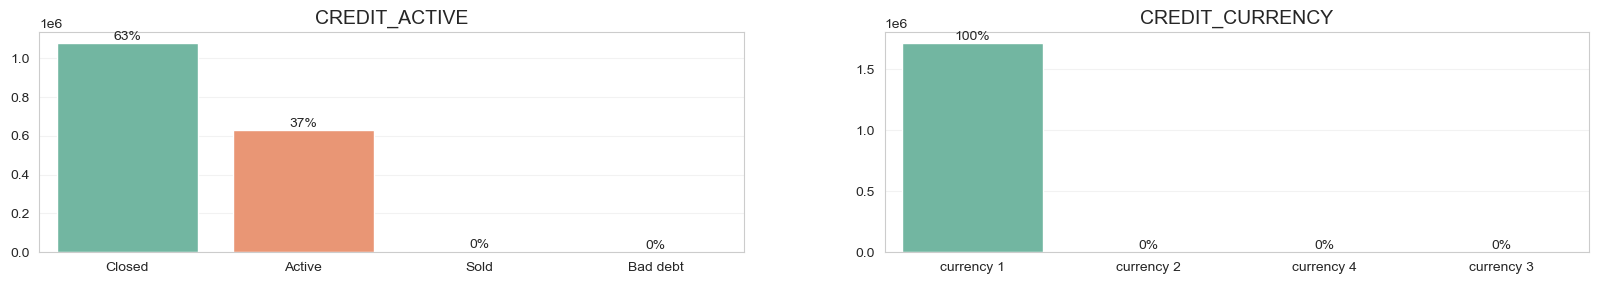

In [287]:
display_categorical(df_bureau, ['CREDIT_ACTIVE', 'CREDIT_CURRENCY'])

In [288]:
df_bureau['CREDIT_TYPE'].value_counts()

CREDIT_TYPE
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: count, dtype: int64

## Aggregated features

Build a config array for each feature and an aggregation function, then merge into application dataset.
- `AMT_ANNUITY`: Annuity of the Credit Bureau credit
- `AMT_CREDIT_SUM`: Current credit amount for the Credit Bureau credit
- `AMT_CREDIT_SUM_DEBT`: Current debt on Credit Bureau credit
- `AMT_CREDIT_SUM_LIMIT`: Current credit limit of credit card reported in Credit Bureau
- `AMT_CREDIT_SUM_OVERDUE`: Current amount overdue on Credit Bureau credit
- `AMT_CREDIT_MAX_OVERDUE`: Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)
- `CNT_CREDIT_PROLONG`: How many times was the Credit Bureau credit prolonged
- `CREDIT_DAY_OVERDUE`: Number of days past due on CB credit at the time of application for related loan in our sample
- `DAYS_CREDIT`: How many days before current application did client apply for Credit Bureau credit
- `DAYS_CREDIT_ENDDATE`: Remaining duration of CB credit (in days) at the time of application in Home Credit
- `DAYS_CREDIT_UPDATE`: How many days before loan application did last information about the Credit Bureau credit come


In [289]:
bureau_agg_recipies = [
    ('CREDIT_TYPE', 'count'), 
    ('CREDIT_ACTIVE', 'size')
]

bureau_feat_to_agg = ['AMT_ANNUITY',
                   'AMT_CREDIT_SUM',
                   'AMT_CREDIT_SUM_DEBT',
                   'AMT_CREDIT_SUM_LIMIT',
                   'AMT_CREDIT_SUM_OVERDUE',
                   'AMT_CREDIT_MAX_OVERDUE',
                   'CNT_CREDIT_PROLONG',
                   'CREDIT_DAY_OVERDUE',
                   'DAYS_CREDIT',
                   'DAYS_CREDIT_ENDDATE',
                   'DAYS_CREDIT_UPDATE'
                   ]

for agg_func in ['mean', 'min', 'max', 'sum', 'var']:
    for feature in bureau_feat_to_agg:
        bureau_agg_recipies.append((feature, agg_func))
        
bureau_agg_recipies = [(['SK_ID_CURR'], bureau_agg_recipies)]
bureau_agg_recipies

[(['SK_ID_CURR'],
  [('CREDIT_TYPE', 'count'),
   ('CREDIT_ACTIVE', 'size'),
   ('AMT_ANNUITY', 'mean'),
   ('AMT_CREDIT_SUM', 'mean'),
   ('AMT_CREDIT_SUM_DEBT', 'mean'),
   ('AMT_CREDIT_SUM_LIMIT', 'mean'),
   ('AMT_CREDIT_SUM_OVERDUE', 'mean'),
   ('AMT_CREDIT_MAX_OVERDUE', 'mean'),
   ('CNT_CREDIT_PROLONG', 'mean'),
   ('CREDIT_DAY_OVERDUE', 'mean'),
   ('DAYS_CREDIT', 'mean'),
   ('DAYS_CREDIT_ENDDATE', 'mean'),
   ('DAYS_CREDIT_UPDATE', 'mean'),
   ('AMT_ANNUITY', 'min'),
   ('AMT_CREDIT_SUM', 'min'),
   ('AMT_CREDIT_SUM_DEBT', 'min'),
   ('AMT_CREDIT_SUM_LIMIT', 'min'),
   ('AMT_CREDIT_SUM_OVERDUE', 'min'),
   ('AMT_CREDIT_MAX_OVERDUE', 'min'),
   ('CNT_CREDIT_PROLONG', 'min'),
   ('CREDIT_DAY_OVERDUE', 'min'),
   ('DAYS_CREDIT', 'min'),
   ('DAYS_CREDIT_ENDDATE', 'min'),
   ('DAYS_CREDIT_UPDATE', 'min'),
   ('AMT_ANNUITY', 'max'),
   ('AMT_CREDIT_SUM', 'max'),
   ('AMT_CREDIT_SUM_DEBT', 'max'),
   ('AMT_CREDIT_SUM_LIMIT', 'max'),
   ('AMT_CREDIT_SUM_OVERDUE', 'max'),
   ('AMT_C

In [290]:
groupby_bureau_agg_names = []

for groupby_cols, specs in tqdm.tqdm(bureau_agg_recipies):
    group_object = df_bureau.groupby(groupby_cols)
    
    for feature, agg_func in tqdm.tqdm(specs):
        groupby_bureau_agg_name = '{}_{}_{}'.format('BUREAU', feature, agg_func)
        df_application = df_application.merge(group_object[feature]
                              .agg(agg_func)
                              .reset_index()
                              .rename(index=str,
                                      columns={feature: groupby_bureau_agg_name})
                              [groupby_cols + [groupby_bureau_agg_name]],
                              on=groupby_cols,
                              how='left')
        groupby_bureau_agg_names.append(groupby_bureau_agg_name)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

In [291]:
df_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307505 entries, 0 to 307504
Data columns (total 240 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    SK_ID_CURR                             int64  
 1    TARGET                                 object 
 2    NAME_CONTRACT_TYPE                     object 
 3    CODE_GENDER                            object 
 4    FLAG_OWN_CAR                           object 
 5    FLAG_OWN_REALTY                        object 
 6    CNT_CHILDREN                           int64  
 7    AMT_INCOME_TOTAL                       float64
 8    AMT_CREDIT                             float64
 9    AMT_ANNUITY                            float64
 10   AMT_GOODS_PRICE                        float64
 11   NAME_TYPE_SUITE                        object 
 12   NAME_INCOME_TYPE                       object 
 13   NAME_EDUCATION_TYPE                    object 
 14   NAME_FAMILY_STATUS                

In [292]:
groupby_bureau_agg_names

['BUREAU_CREDIT_TYPE_count',
 'BUREAU_CREDIT_ACTIVE_size',
 'BUREAU_AMT_ANNUITY_mean',
 'BUREAU_AMT_CREDIT_SUM_mean',
 'BUREAU_AMT_CREDIT_SUM_DEBT_mean',
 'BUREAU_AMT_CREDIT_SUM_LIMIT_mean',
 'BUREAU_AMT_CREDIT_SUM_OVERDUE_mean',
 'BUREAU_AMT_CREDIT_MAX_OVERDUE_mean',
 'BUREAU_CNT_CREDIT_PROLONG_mean',
 'BUREAU_CREDIT_DAY_OVERDUE_mean',
 'BUREAU_DAYS_CREDIT_mean',
 'BUREAU_DAYS_CREDIT_ENDDATE_mean',
 'BUREAU_DAYS_CREDIT_UPDATE_mean',
 'BUREAU_AMT_ANNUITY_min',
 'BUREAU_AMT_CREDIT_SUM_min',
 'BUREAU_AMT_CREDIT_SUM_DEBT_min',
 'BUREAU_AMT_CREDIT_SUM_LIMIT_min',
 'BUREAU_AMT_CREDIT_SUM_OVERDUE_min',
 'BUREAU_AMT_CREDIT_MAX_OVERDUE_min',
 'BUREAU_CNT_CREDIT_PROLONG_min',
 'BUREAU_CREDIT_DAY_OVERDUE_min',
 'BUREAU_DAYS_CREDIT_min',
 'BUREAU_DAYS_CREDIT_ENDDATE_min',
 'BUREAU_DAYS_CREDIT_UPDATE_min',
 'BUREAU_AMT_ANNUITY_max',
 'BUREAU_AMT_CREDIT_SUM_max',
 'BUREAU_AMT_CREDIT_SUM_DEBT_max',
 'BUREAU_AMT_CREDIT_SUM_LIMIT_max',
 'BUREAU_AMT_CREDIT_SUM_OVERDUE_max',
 'BUREAU_AMT_CREDIT_MAX_OVER

In [293]:
bureau_agg_corr = abs(df_application[groupby_bureau_agg_names + ['TARGET']].corr())
bureau_agg_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                               1.0000
BUREAU_DAYS_CREDIT_mean              0.0897
BUREAU_DAYS_CREDIT_min               0.0752
BUREAU_DAYS_CREDIT_UPDATE_mean       0.0689
BUREAU_DAYS_CREDIT_ENDDATE_sum       0.0537
BUREAU_DAYS_CREDIT_max               0.0498
BUREAU_DAYS_CREDIT_ENDDATE_mean      0.0470
BUREAU_DAYS_CREDIT_UPDATE_min        0.0429
BUREAU_DAYS_CREDIT_sum               0.0420
BUREAU_DAYS_CREDIT_UPDATE_sum        0.0414
BUREAU_DAYS_CREDIT_var               0.0384
BUREAU_DAYS_CREDIT_ENDDATE_var       0.0374
BUREAU_DAYS_CREDIT_ENDDATE_max       0.0366
BUREAU_DAYS_CREDIT_ENDDATE_min       0.0343
BUREAU_DAYS_CREDIT_UPDATE_max        0.0282
BUREAU_AMT_CREDIT_SUM_mean           0.0200
BUREAU_AMT_CREDIT_SUM_max            0.0197
BUREAU_AMT_CREDIT_SUM_sum            0.0141
BUREAU_AMT_CREDIT_SUM_OVERDUE_sum    0.0133
BUREAU_AMT_CREDIT_SUM_LIMIT_mean     0.0114
BUREAU_AMT_CREDIT_SUM_min            0.0108
BUREAU_AMT_CREDIT_SUM_LIMIT_max      0.0106
BUREAU_AMT_CREDIT_SUM_OVERDUE_ma

57


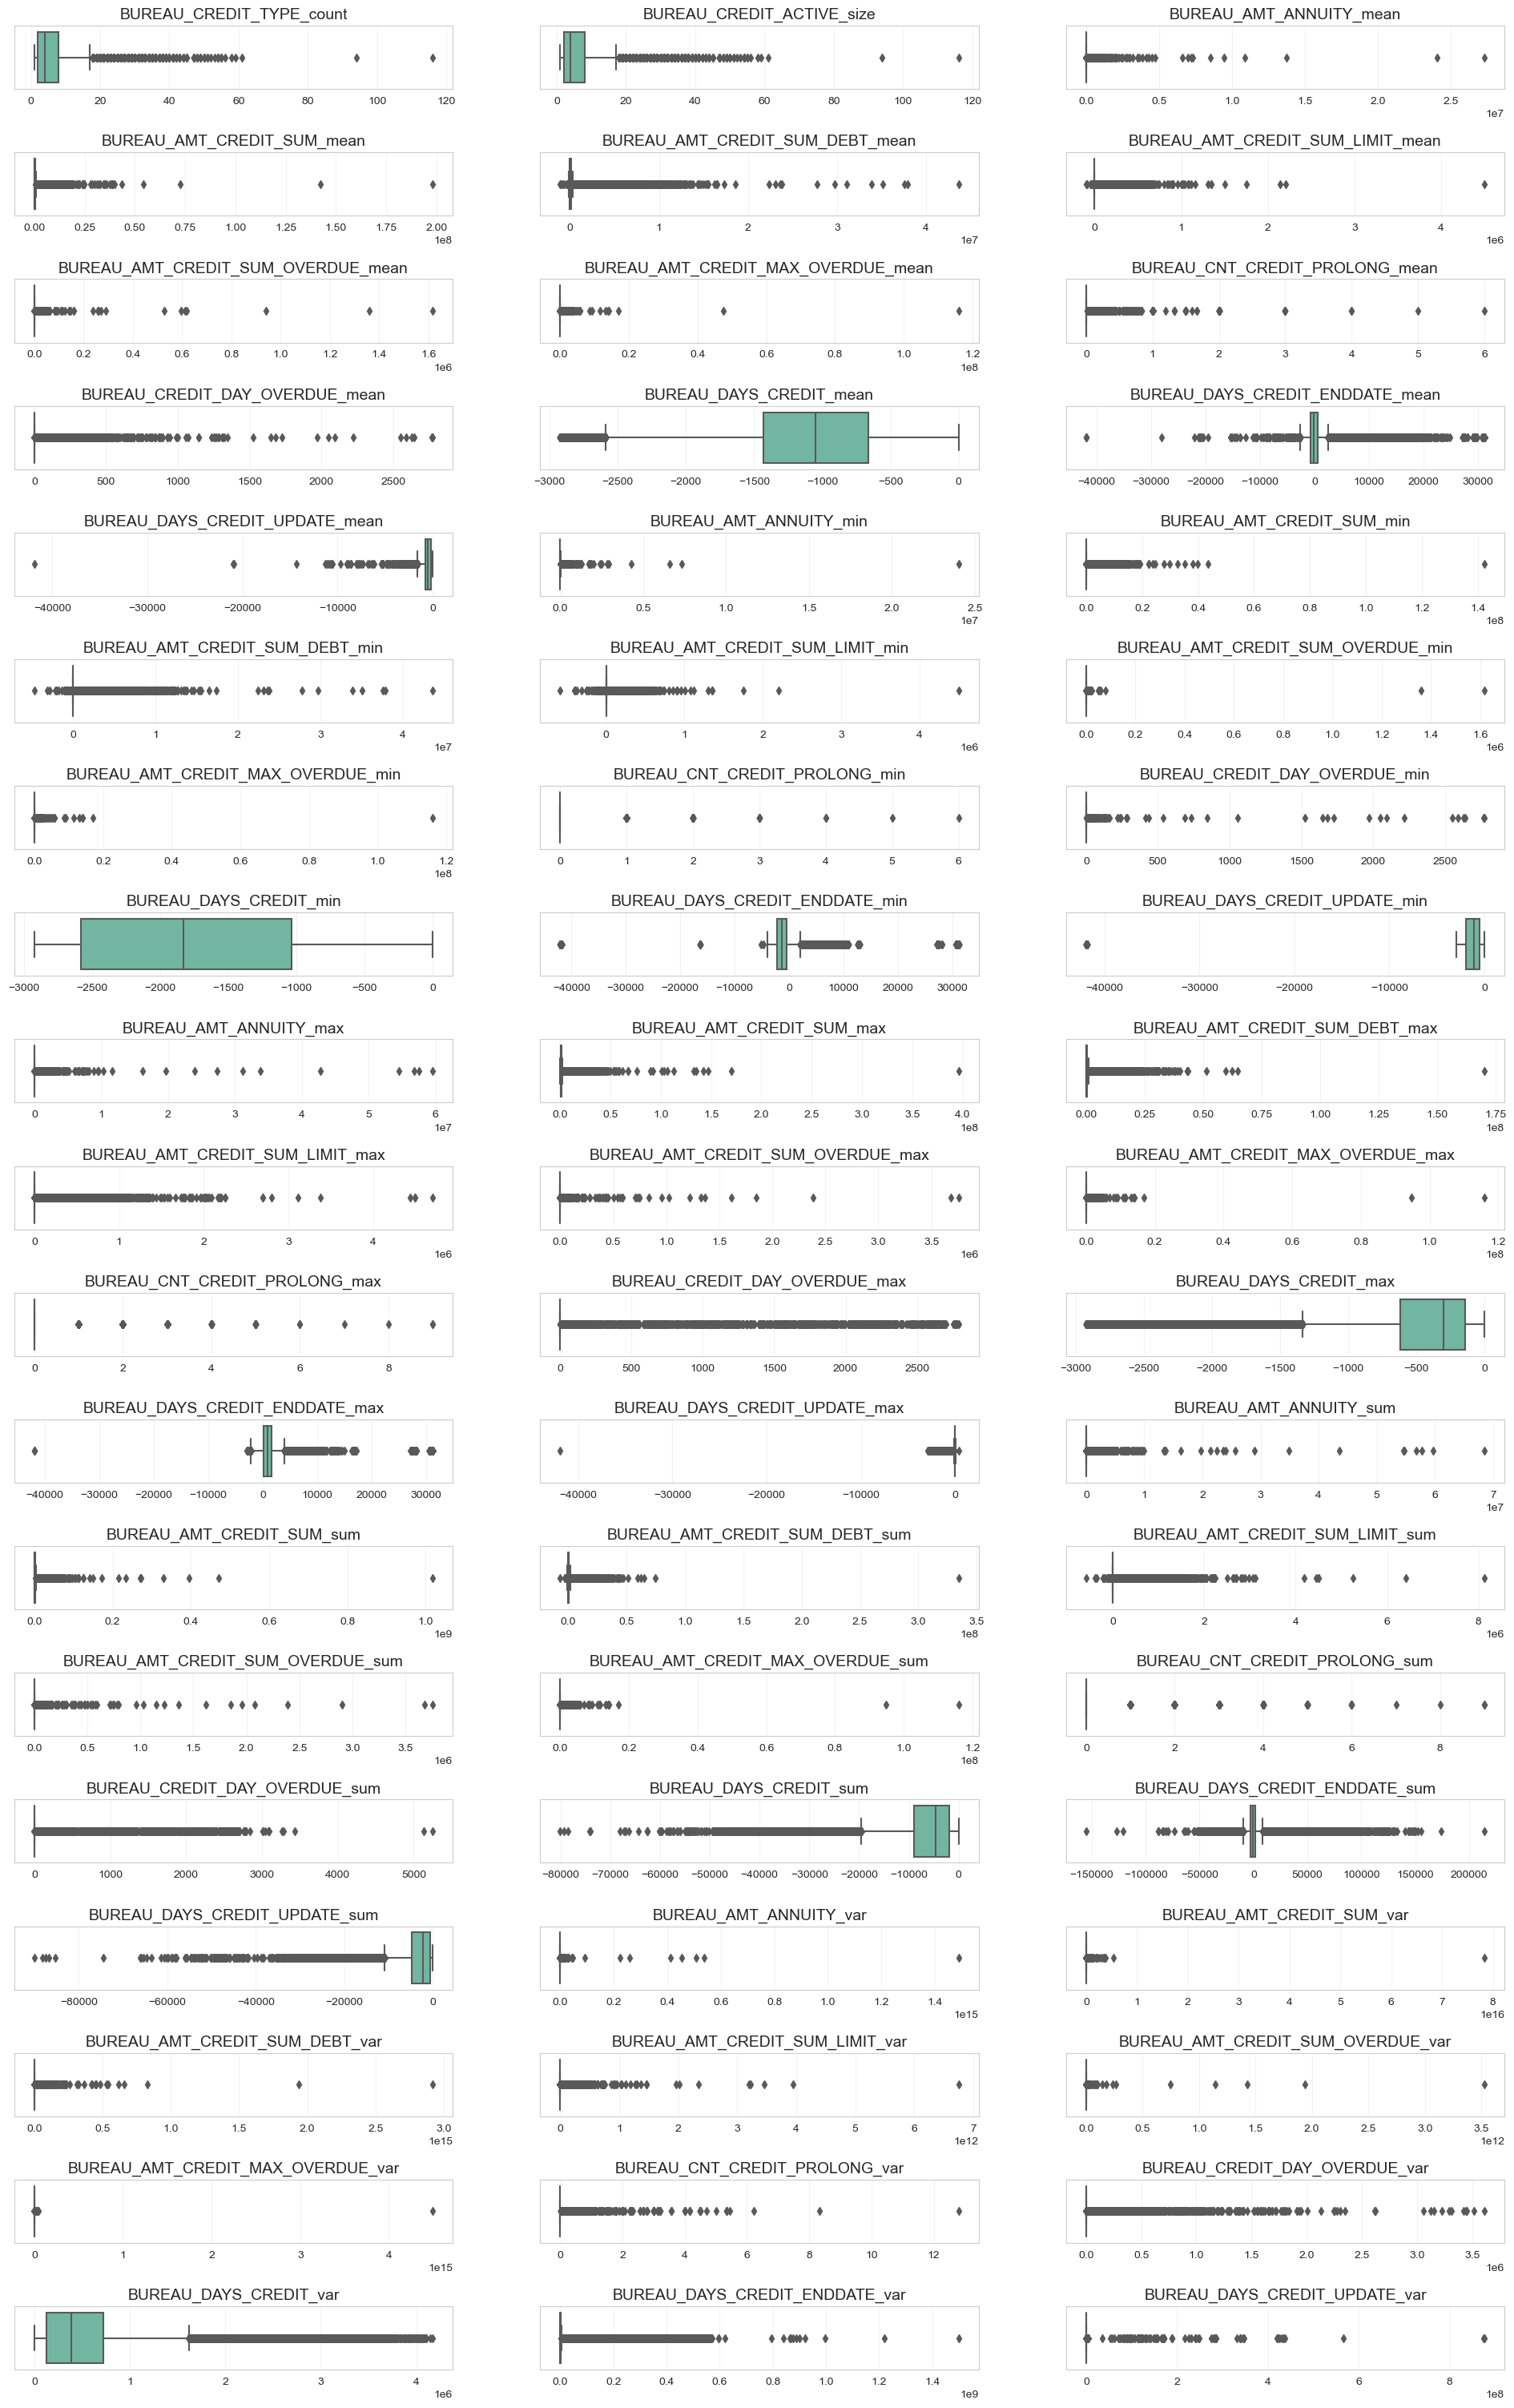

In [294]:
display_distribution(df_application[groupby_bureau_agg_names])

# POS Cash balance

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

In [295]:
df_pos_cash = pd.read_csv('./data/source/POS_CASH_balance.csv')
df_pos_cash.head(10)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31         48.0000   
1     1715348      367990             -33         36.0000   
2     1784872      397406             -32         12.0000   
3     1903291      269225             -35         48.0000   
4     2341044      334279             -35         36.0000   
5     2207092      342166             -32         12.0000   
6     1110516      204376             -38         48.0000   
7     1387235      153211             -35         36.0000   
8     1220500      112740             -31         12.0000   
9     2371489      274851             -32         24.0000   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                45.0000               Active       0           0  
1                35.0000               Active       0           0  
2                 9.0000               Active       0           0  
3                42.0000               Active       0           0  
4                35.0000               Active       0           0  
5                12.0000               Active       0           0  
6                43.0000               Active       0           0  
7                36.0000               Active       0           0  
8                12.0000               Active       0           0  
9                16.0000               Active       0           0

In [296]:
df_pos_cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [297]:
df_pos_cash['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: count, dtype: int64

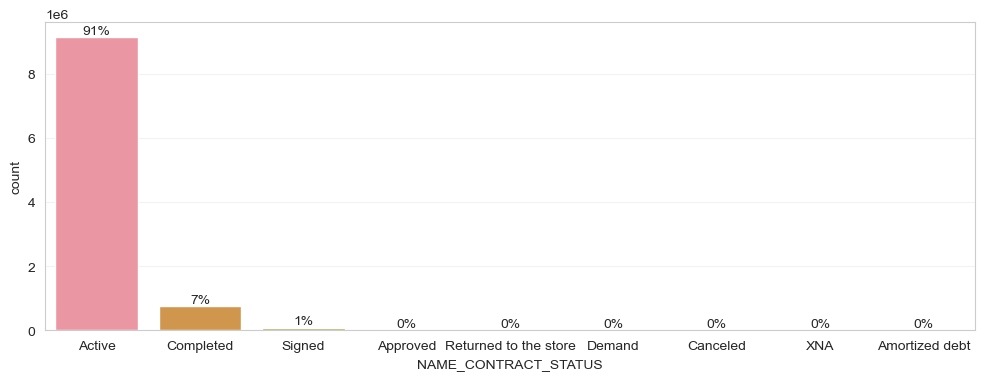

In [298]:
plt.figure(figsize=(12,4))
ax = sns.countplot(df_pos_cash, x='NAME_CONTRACT_STATUS')
ax.bar_label(
    ax.containers[0], fmt=lambda x: '{:.0f}%'.format(
        x/df_pos_cash.shape[0]*100), fontsize=10
)

plt.show()

## Aggregated features

The following features will be explored:

-  `MONTHS_BALANCE` :Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )	
- `SK_DPD`: DPD (days past due) during the month of previous credit	
- `SK_DPD_DEF`: DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit

In [299]:
pos_cash_agg_recipies = []

pos_cash_features_to_agg = [
    'MONTHS_BALANCE',
    'SK_DPD',
    'SK_DPD_DEF',
]

for agg in ['mean', 'max']:
    for feature in pos_cash_features_to_agg:
        pos_cash_agg_recipies.append((feature, agg))

pos_cash_agg_recipies

[('MONTHS_BALANCE', 'mean'),
 ('SK_DPD', 'mean'),
 ('SK_DPD_DEF', 'mean'),
 ('MONTHS_BALANCE', 'max'),
 ('SK_DPD', 'max'),
 ('SK_DPD_DEF', 'max')]

In [300]:
pos_cash_agg_recipies = [(['SK_ID_CURR'], pos_cash_agg_recipies)]
pos_cash_agg_recipies

[(['SK_ID_CURR'],
  [('MONTHS_BALANCE', 'mean'),
   ('SK_DPD', 'mean'),
   ('SK_DPD_DEF', 'mean'),
   ('MONTHS_BALANCE', 'max'),
   ('SK_DPD', 'max'),
   ('SK_DPD_DEF', 'max')])]

In [301]:
groupby_pos_cash_agg_names = []

for groupby_cols, specs in tqdm.tqdm(pos_cash_agg_recipies):
    group_object = df_pos_cash.groupby(groupby_cols)
    
    for feature, agg_func in tqdm.tqdm(specs):
        groupby_pos_cash_agg_name = '{}_{}_{}'.format('POS_CASH', feature, agg_func)
        df_application = df_application.merge(group_object[feature]
                              .agg(agg_func)
                              .reset_index()
                              .rename(index=str,
                                      columns={feature: groupby_pos_cash_agg_name})
                              [groupby_cols + [groupby_pos_cash_agg_name]],
                              on=groupby_cols,
                              how='left')
        groupby_pos_cash_agg_names.append(groupby_pos_cash_agg_name)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [302]:
groupby_pos_cash_agg_names

['POS_CASH_MONTHS_BALANCE_mean',
 'POS_CASH_SK_DPD_mean',
 'POS_CASH_SK_DPD_DEF_mean',
 'POS_CASH_MONTHS_BALANCE_max',
 'POS_CASH_SK_DPD_max',
 'POS_CASH_SK_DPD_DEF_max']

In [304]:
df_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307505 entries, 0 to 307504
Data columns (total 246 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    SK_ID_CURR                             int64  
 1    TARGET                                 object 
 2    NAME_CONTRACT_TYPE                     object 
 3    CODE_GENDER                            object 
 4    FLAG_OWN_CAR                           object 
 5    FLAG_OWN_REALTY                        object 
 6    CNT_CHILDREN                           int64  
 7    AMT_INCOME_TOTAL                       float64
 8    AMT_CREDIT                             float64
 9    AMT_ANNUITY                            float64
 10   AMT_GOODS_PRICE                        float64
 11   NAME_TYPE_SUITE                        object 
 12   NAME_INCOME_TYPE                       object 
 13   NAME_EDUCATION_TYPE                    object 
 14   NAME_FAMILY_STATUS                

In [305]:
pos_cash_agg_corr = abs(df_application[groupby_pos_cash_agg_names + ['TARGET']].corr())
pos_cash_agg_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                         1.0000
POS_CASH_MONTHS_BALANCE_mean   0.0345
POS_CASH_SK_DPD_DEF_max        0.0096
POS_CASH_SK_DPD_DEF_mean       0.0065
POS_CASH_SK_DPD_mean           0.0054
POS_CASH_SK_DPD_max            0.0048
POS_CASH_MONTHS_BALANCE_max    0.0043
Name: TARGET, dtype: float64

6


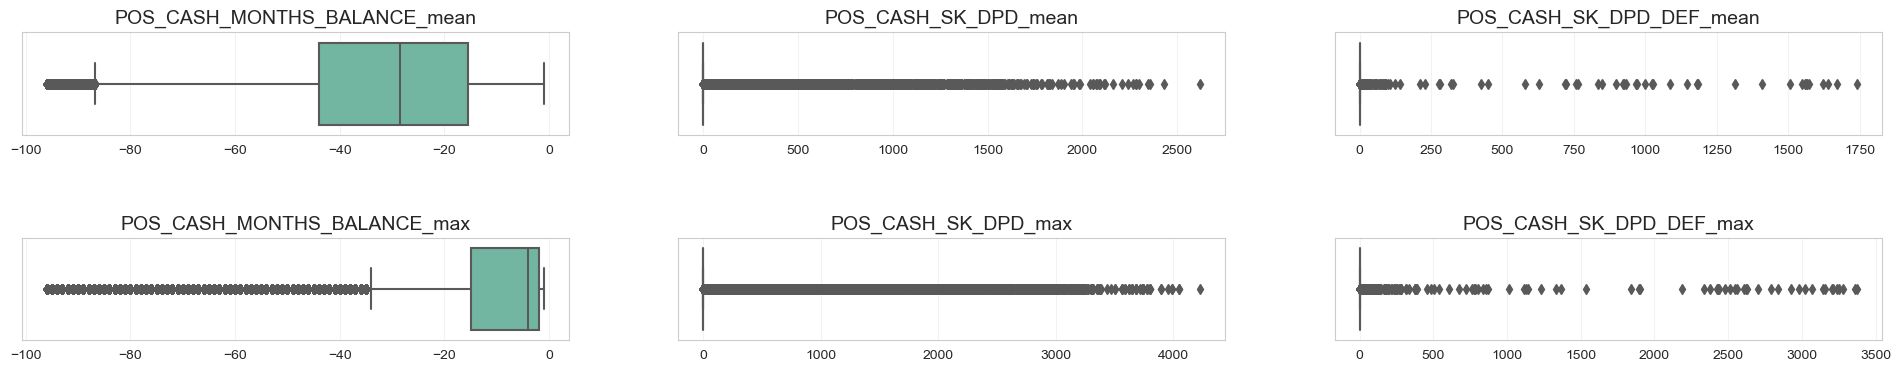

In [306]:
display_distribution(df_application[groupby_pos_cash_agg_names])

# Credit card balance

- Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

In [307]:
df_cc_balance = pd.read_csv('./data/source/credit_card_balance.csv')
df_cc_balance.head(10)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6      56.9700   
1     2582071      363914              -1   63975.5550   
2     1740877      371185              -7   31815.2250   
3     1389973      337855              -4  236572.1100   
4     1891521      126868              -1  453919.4550   
5     2646502      380010              -7   82903.8150   
6     1079071      171320              -6  353451.6450   
7     2095912      118650              -7   47962.1250   
8     2181852      367360              -4  291543.0750   
9     1235299      203885              -5  201261.1950   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                    0.0000              877.5000   
1                    45000                 2250.0000             2250.0000   
2                   450000                    0.0000                0.0000   
3                   225000                 2250.0000             2250.0000   
4                   450000                    0.0000            11547.0000   
5                   270000                    0.0000                0.0000   
6                   585000                67500.0000            67500.0000   
7                    45000                45000.0000            45000.0000   
8                   292500                90000.0000           289339.4250   
9                   225000                76500.0000           111026.7000   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                      0.0000                  877.5000   
1                      0.0000                    0.0000   
2                      0.0000                    0.0000   
3                      0.0000                    0.0000   
4                      0.0000                11547.0000   
5                      0.0000                    0.0000   
6                      0.0000                    0.0000   
7                      0.0000                    0.0000   
8                      0.0000               199339.4250   
9                      0.0000                34526.7000   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                1700.3250  ...         0.0000                0.0000   
1                2250.0000  ...     64875.5550            64875.5550   
2                2250.0000  ...     31460.0850            31460.0850   
3               11795.7600  ...    233048.9700           233048.9700   
4               22924.8900  ...    453919.4550           453919.4550   
5                4449.1050  ...     82773.3150            82773.3150   
6               14684.1750  ...    351881.1450           351881.1450   
7                   0.0000  ...     47962.1250            47962.1250   
8                 130.5000  ...    286831.5750           286831.5750   
9                6338.3400  ...    197224.6950           197224.6950   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                    0.0000                     1                      0.0000   
1                    1.0000                     1                      0.0000   
2                    0.0000                     0                      0.0000   
3                    1.0000                     1                      0.0000   
4                    0.0000                     1                      0.0000   
5                    0.0000                     0                      0.0000   
6                    1.0000                     1                      0.0000   
7                    1.0000                     1                      0.0000   
8                    3.0000                     8                      0.0000   
9                    3.0000                     9                      0.0000   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                    1.0000                    35.0000                Active   
1         

In [308]:
df_cc_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [309]:
df_cc_balance['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: count, dtype: int64

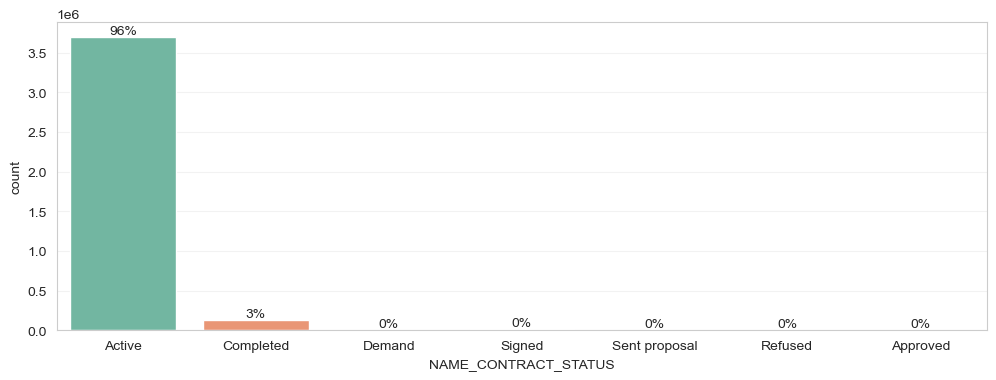

In [310]:
plt.figure(figsize=(12,4))
ax = sns.countplot(df_cc_balance, x='NAME_CONTRACT_STATUS')
ax.bar_label(
    ax.containers[0], fmt=lambda x: '{:.0f}%'.format(
        x/df_cc_balance.shape[0]*100), fontsize=10
)

plt.show()

## Aggregated features

In [311]:
df_description.loc[df_description['Table'] == 'credit_card_balance.csv', ['Row', 'Description', 'Special']]

Row  \
150                 SK_ID_PREV    
151                  SK_ID_CURR   
152              MONTHS_BALANCE   
153                 AMT_BALANCE   
154     AMT_CREDIT_LIMIT_ACTUAL   
155    AMT_DRAWINGS_ATM_CURRENT   
156        AMT_DRAWINGS_CURRENT   
157  AMT_DRAWINGS_OTHER_CURRENT   
158    AMT_DRAWINGS_POS_CURRENT   
159     AMT_INST_MIN_REGULARITY   
160         AMT_PAYMENT_CURRENT   
161   AMT_PAYMENT_TOTAL_CURRENT   
162    AMT_RECEIVABLE_PRINCIPAL   
163               AMT_RECIVABLE   
164        AMT_TOTAL_RECEIVABLE   
165    CNT_DRAWINGS_ATM_CURRENT   
166        CNT_DRAWINGS_CURRENT   
167  CNT_DRAWINGS_OTHER_CURRENT   
168    CNT_DRAWINGS_POS_CURRENT   
169   CNT_INSTALMENT_MATURE_CUM   
170        NAME_CONTRACT_STATUS   
171                      SK_DPD   
172                  SK_DPD_DEF   

                                                                                                                                           Description  \
150  ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)   
151                                                                                                                           ID of loan in our sample   
152                                                                 Month of balance relative to application date (-1 means the freshest balance date)   
153                                                                                                        Balance during the month of previous credit   
154                                                                                          Credit card limit during the month of the previous credit   
155                                                                                      Amount drawing at ATM during the month of the previous credit   
156                                                                                             Amount drawing during the month of the previous credit   
157                                                                                   Amount of other drawings during the month of the previous credit   
158                                                                             Amount drawing or buying goods during the month of the previous credit   
159                                                                                          Minimal installment for this month of the previous credit   
160                                                                                How much did the client pay during the month on the previous credit   
161                                                                       How much did the client pay during the month in total on the previous credit   
162                                                                                             Amount receivable for principal on the previous credit   
163                                                                                                           Amount receivable on the previous credit   
164                                                                                                     Total amount receivable on the previous credit   
165                                                                                 Number of drawings at ATM during this month on the previous credit   
166                                                                                        Number of drawings during this month on the previous credit   
167                                                                                  Number of other drawings during this month on the previous credit   
168                                                                              Number of drawings for goods during this month on the previous credit   
169                                                                                                 Number 

In [312]:
cc_balance_agg_recipies = []

cc_balance_features_to_agg = [
     'MONTHS_BALANCE',
     'AMT_BALANCE' ,
     'AMT_CREDIT_LIMIT_ACTUAL',
     'AMT_DRAWINGS_ATM_CURRENT',
     'AMT_DRAWINGS_CURRENT',
     'AMT_DRAWINGS_OTHER_CURRENT',
     'AMT_DRAWINGS_POS_CURRENT',
     'AMT_INST_MIN_REGULARITY',
     'AMT_PAYMENT_CURRENT',
     'AMT_PAYMENT_TOTAL_CURRENT',
     'AMT_RECEIVABLE_PRINCIPAL',
     'AMT_RECIVABLE',
     'AMT_TOTAL_RECEIVABLE',
     'CNT_DRAWINGS_ATM_CURRENT',
     'CNT_DRAWINGS_CURRENT',
     'CNT_DRAWINGS_OTHER_CURRENT',
     'CNT_DRAWINGS_POS_CURRENT',
     'CNT_INSTALMENT_MATURE_CUM',
     'SK_DPD',  
     'SK_DPD_DEF'         
]

for agg in ['min', 'max', 'mean', 'sum', 'var']:
    for feature in cc_balance_features_to_agg:
        cc_balance_agg_recipies.append((feature, agg))

cc_balance_agg_recipies

[('MONTHS_BALANCE', 'min'),
 ('AMT_BALANCE', 'min'),
 ('AMT_CREDIT_LIMIT_ACTUAL', 'min'),
 ('AMT_DRAWINGS_ATM_CURRENT', 'min'),
 ('AMT_DRAWINGS_CURRENT', 'min'),
 ('AMT_DRAWINGS_OTHER_CURRENT', 'min'),
 ('AMT_DRAWINGS_POS_CURRENT', 'min'),
 ('AMT_INST_MIN_REGULARITY', 'min'),
 ('AMT_PAYMENT_CURRENT', 'min'),
 ('AMT_PAYMENT_TOTAL_CURRENT', 'min'),
 ('AMT_RECEIVABLE_PRINCIPAL', 'min'),
 ('AMT_RECIVABLE', 'min'),
 ('AMT_TOTAL_RECEIVABLE', 'min'),
 ('CNT_DRAWINGS_ATM_CURRENT', 'min'),
 ('CNT_DRAWINGS_CURRENT', 'min'),
 ('CNT_DRAWINGS_OTHER_CURRENT', 'min'),
 ('CNT_DRAWINGS_POS_CURRENT', 'min'),
 ('CNT_INSTALMENT_MATURE_CUM', 'min'),
 ('SK_DPD', 'min'),
 ('SK_DPD_DEF', 'min'),
 ('MONTHS_BALANCE', 'max'),
 ('AMT_BALANCE', 'max'),
 ('AMT_CREDIT_LIMIT_ACTUAL', 'max'),
 ('AMT_DRAWINGS_ATM_CURRENT', 'max'),
 ('AMT_DRAWINGS_CURRENT', 'max'),
 ('AMT_DRAWINGS_OTHER_CURRENT', 'max'),
 ('AMT_DRAWINGS_POS_CURRENT', 'max'),
 ('AMT_INST_MIN_REGULARITY', 'max'),
 ('AMT_PAYMENT_CURRENT', 'max'),
 ('AMT_PA

In [313]:
cc_balance_agg_recipies = [(['SK_ID_CURR'], cc_balance_agg_recipies)]
cc_balance_agg_recipies

[(['SK_ID_CURR'],
  [('MONTHS_BALANCE', 'min'),
   ('AMT_BALANCE', 'min'),
   ('AMT_CREDIT_LIMIT_ACTUAL', 'min'),
   ('AMT_DRAWINGS_ATM_CURRENT', 'min'),
   ('AMT_DRAWINGS_CURRENT', 'min'),
   ('AMT_DRAWINGS_OTHER_CURRENT', 'min'),
   ('AMT_DRAWINGS_POS_CURRENT', 'min'),
   ('AMT_INST_MIN_REGULARITY', 'min'),
   ('AMT_PAYMENT_CURRENT', 'min'),
   ('AMT_PAYMENT_TOTAL_CURRENT', 'min'),
   ('AMT_RECEIVABLE_PRINCIPAL', 'min'),
   ('AMT_RECIVABLE', 'min'),
   ('AMT_TOTAL_RECEIVABLE', 'min'),
   ('CNT_DRAWINGS_ATM_CURRENT', 'min'),
   ('CNT_DRAWINGS_CURRENT', 'min'),
   ('CNT_DRAWINGS_OTHER_CURRENT', 'min'),
   ('CNT_DRAWINGS_POS_CURRENT', 'min'),
   ('CNT_INSTALMENT_MATURE_CUM', 'min'),
   ('SK_DPD', 'min'),
   ('SK_DPD_DEF', 'min'),
   ('MONTHS_BALANCE', 'max'),
   ('AMT_BALANCE', 'max'),
   ('AMT_CREDIT_LIMIT_ACTUAL', 'max'),
   ('AMT_DRAWINGS_ATM_CURRENT', 'max'),
   ('AMT_DRAWINGS_CURRENT', 'max'),
   ('AMT_DRAWINGS_OTHER_CURRENT', 'max'),
   ('AMT_DRAWINGS_POS_CURRENT', 'max'),
   ('AM

In [314]:
groupby_cc_balance_agg_names = []

for groupby_cols, specs in tqdm.tqdm(cc_balance_agg_recipies):
    group_object = df_cc_balance.groupby(groupby_cols)
    
    for feature, agg_func in tqdm.tqdm(specs):
        groupby_cc_balance_agg_name = '{}_{}_{}'.format('CC', feature, agg_func)
        df_application = df_application.merge(group_object[feature]
                              .agg(agg_func)
                              .reset_index()
                              .rename(index=str,
                                      columns={feature: groupby_cc_balance_agg_name})
                              [groupby_cols + [groupby_cc_balance_agg_name]],
                              on=groupby_cols,
                              how='left')
        groupby_cc_balance_agg_names.append(groupby_cc_balance_agg_name)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [315]:
groupby_cc_balance_agg_names

['CC_MONTHS_BALANCE_min',
 'CC_AMT_BALANCE_min',
 'CC_AMT_CREDIT_LIMIT_ACTUAL_min',
 'CC_AMT_DRAWINGS_ATM_CURRENT_min',
 'CC_AMT_DRAWINGS_CURRENT_min',
 'CC_AMT_DRAWINGS_OTHER_CURRENT_min',
 'CC_AMT_DRAWINGS_POS_CURRENT_min',
 'CC_AMT_INST_MIN_REGULARITY_min',
 'CC_AMT_PAYMENT_CURRENT_min',
 'CC_AMT_PAYMENT_TOTAL_CURRENT_min',
 'CC_AMT_RECEIVABLE_PRINCIPAL_min',
 'CC_AMT_RECIVABLE_min',
 'CC_AMT_TOTAL_RECEIVABLE_min',
 'CC_CNT_DRAWINGS_ATM_CURRENT_min',
 'CC_CNT_DRAWINGS_CURRENT_min',
 'CC_CNT_DRAWINGS_OTHER_CURRENT_min',
 'CC_CNT_DRAWINGS_POS_CURRENT_min',
 'CC_CNT_INSTALMENT_MATURE_CUM_min',
 'CC_SK_DPD_min',
 'CC_SK_DPD_DEF_min',
 'CC_MONTHS_BALANCE_max',
 'CC_AMT_BALANCE_max',
 'CC_AMT_CREDIT_LIMIT_ACTUAL_max',
 'CC_AMT_DRAWINGS_ATM_CURRENT_max',
 'CC_AMT_DRAWINGS_CURRENT_max',
 'CC_AMT_DRAWINGS_OTHER_CURRENT_max',
 'CC_AMT_DRAWINGS_POS_CURRENT_max',
 'CC_AMT_INST_MIN_REGULARITY_max',
 'CC_AMT_PAYMENT_CURRENT_max',
 'CC_AMT_PAYMENT_TOTAL_CURRENT_max',
 'CC_AMT_RECEIVABLE_PRINCIPAL_

In [316]:
df_application.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307505 entries, 0 to 307504
Data columns (total 346 columns):
 #    Column                                 Non-Null Count   Dtype  
---   ------                                 --------------   -----  
 0    SK_ID_CURR                             307505 non-null  int64  
 1    TARGET                                 307505 non-null  object 
 2    NAME_CONTRACT_TYPE                     307505 non-null  object 
 3    CODE_GENDER                            307505 non-null  object 
 4    FLAG_OWN_CAR                           307505 non-null  object 
 5    FLAG_OWN_REALTY                        307505 non-null  object 
 6    CNT_CHILDREN                           307505 non-null  int64  
 7    AMT_INCOME_TOTAL                       307505 non-null  float64
 8    AMT_CREDIT                             307505 non-null  float64
 9    AMT_ANNUITY                            307493 non-null  float64
 10   AMT_GOODS_PRICE                        307

In [317]:
cc_balance_agg_corr = abs(df_application[groupby_cc_balance_agg_names + ['TARGET']].corr())
cc_balance_agg_corr.sort_values('TARGET', ascending=False)['TARGET'][:20]

TARGET                             1.0000
CC_CNT_DRAWINGS_ATM_CURRENT_mean   0.1077
CC_CNT_DRAWINGS_CURRENT_max        0.1014
CC_AMT_BALANCE_mean                0.0872
CC_AMT_TOTAL_RECEIVABLE_mean       0.0865
CC_AMT_RECIVABLE_mean              0.0865
CC_AMT_RECEIVABLE_PRINCIPAL_mean   0.0861
CC_CNT_DRAWINGS_CURRENT_mean       0.0825
CC_AMT_INST_MIN_REGULARITY_mean    0.0737
CC_CNT_DRAWINGS_POS_CURRENT_max    0.0689
CC_AMT_BALANCE_max                 0.0688
CC_AMT_TOTAL_RECEIVABLE_max        0.0681
CC_AMT_RECIVABLE_max               0.0681
CC_AMT_RECEIVABLE_PRINCIPAL_max    0.0669
CC_AMT_BALANCE_min                 0.0642
CC_AMT_INST_MIN_REGULARITY_max     0.0639
CC_CNT_DRAWINGS_ATM_CURRENT_max    0.0637
CC_AMT_RECIVABLE_min               0.0636
CC_AMT_TOTAL_RECEIVABLE_min        0.0636
CC_AMT_RECEIVABLE_PRINCIPAL_min    0.0632
Name: TARGET, dtype: float64

100


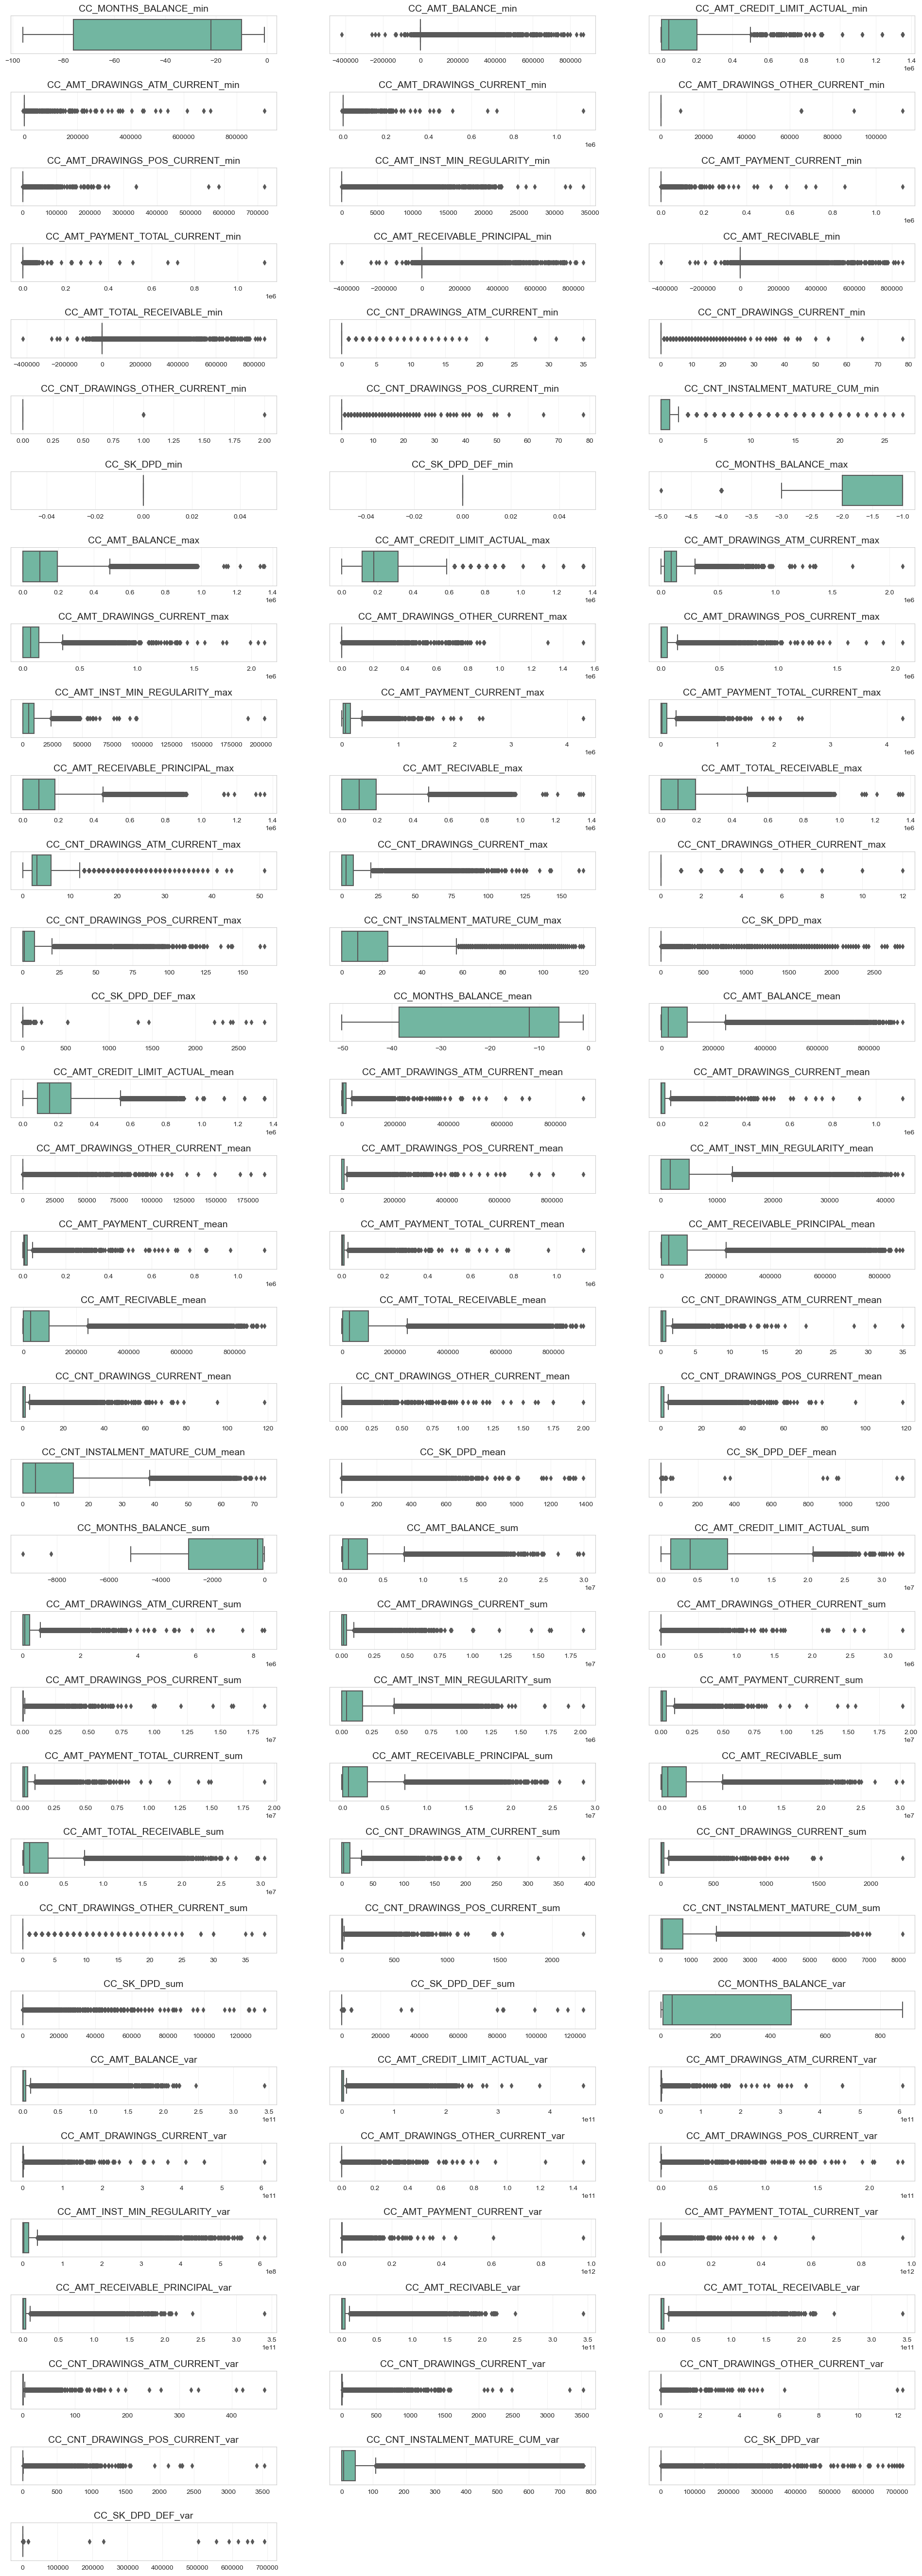

In [318]:
display_distribution(df_application[groupby_cc_balance_agg_names])

# Installments payments

- Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
- There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

In [319]:
df_installments = pd.read_csv('./data/source/installments_payments.csv')
df_installments.head(10)

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                  1.0000                      6   
1     1330831      151639                  0.0000                     34   
2     2085231      193053                  2.0000                      1   
3     2452527      199697                  1.0000                      3   
4     2714724      167756                  1.0000                      2   
5     1137312      164489                  1.0000                     12   
6     2234264      184693                  4.0000                     11   
7     1818599      111420                  2.0000                      4   
8     2723183      112102                  0.0000                     14   
9     1413990      109741                  1.0000                      4   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0       -1180.0000          -1187.0000       6948.3600    6948.3600  
1       -2156.0000          -2156.0000       1716.5250    1716.5250  
2         -63.0000            -63.0000      25425.0000   25425.0000  
3       -2418.0000          -2426.0000      24350.1300   24350.1300  
4       -1383.0000          -1366.0000       2165.0400    2160.5850  
5       -1384.0000          -1417.0000       5970.3750    5970.3750  
6        -349.0000           -352.0000      29432.2950   29432.2950  
7        -968.0000           -994.0000      17862.1650   17862.1650  
8        -197.0000           -197.0000         70.7400      70.7400  
9        -570.0000           -609.0000      14308.4700   14308.4700

In [320]:
df_installments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [321]:
df_description.loc[df_description['Table'] == 'installments_payments.csv', ['Row', 'Description', 'Special']]

Row  \
211             SK_ID_PREV    
212              SK_ID_CURR   
213  NUM_INSTALMENT_VERSION   
214   NUM_INSTALMENT_NUMBER   
215         DAYS_INSTALMENT   
216      DAYS_ENTRY_PAYMENT   
217          AMT_INSTALMENT   
218             AMT_PAYMENT   

                                                                                                                                                                                    Description  \
211                                           ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)   
212                                                                                                                                                                    ID of loan in our sample   
213  Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed   
214                                                                                                                                                     On which installment we observe payment   
215                                                                              When the installment of previous credit was supposed to be paid (relative to application date of current loan)   
216                                                                                   When was the installments of previous credit paid actually (relative to application date of current loan)   
217                                                                                                           What was the prescribed installment amount of previous credit on this installment   
218                                                                                                                        What the client actually paid on previous credit on this installment   

                                   Special  
211                                 hashed  
212                                 hashed  
213                                    NaN  
214                                    NaN  
215  time only relative to the application  
216  time only relative to the application  
217                                    NaN  
218                                    NaN

## Engineered features

In [322]:
# Percentage and difference paid in each installment (amount paid and installment value)
df_installments['PAYMENT_PERC'] = df_installments['AMT_PAYMENT'] / df_installments['AMT_INSTALMENT']
df_installments['PAYMENT_DIFF'] = df_installments['AMT_INSTALMENT'] - df_installments['AMT_PAYMENT']

# Days past due and days before due (no negative values)
df_installments['DPD'] = df_installments['DAYS_ENTRY_PAYMENT'] - df_installments['DAYS_INSTALMENT']
df_installments['DBD'] = df_installments['DAYS_INSTALMENT'] - df_installments['DAYS_ENTRY_PAYMENT']
df_installments['DPD'] = df_installments['DPD'].apply(lambda x: x if x > 0 else 0)
df_installments['DBD'] = df_installments['DBD'].apply(lambda x: x if x > 0 else 0)

## Aggregated features

In [323]:
installments_agg_recipies = [
    ('NUM_INSTALMENT_VERSION', 'nunique')
]

installments_features_to_agg = [
    'PAYMENT_PERC',
    'PAYMENT_DIFF',
    'DPD',
    'DBD',
    'DAYS_INSTALMENT',
    'DAYS_ENTRY_PAYMENT',
    'AMT_INSTALMENT',
    'AMT_PAYMENT'
    
]

for agg in ['max', 'mean', 'sum']:
    for feature in installments_features_to_agg:
        installments_agg_recipies.append((feature, agg))

installments_agg_recipies

[('NUM_INSTALMENT_VERSION', 'nunique'),
 ('PAYMENT_PERC', 'max'),
 ('PAYMENT_DIFF', 'max'),
 ('DPD', 'max'),
 ('DBD', 'max'),
 ('DAYS_INSTALMENT', 'max'),
 ('DAYS_ENTRY_PAYMENT', 'max'),
 ('AMT_INSTALMENT', 'max'),
 ('AMT_PAYMENT', 'max'),
 ('PAYMENT_PERC', 'mean'),
 ('PAYMENT_DIFF', 'mean'),
 ('DPD', 'mean'),
 ('DBD', 'mean'),
 ('DAYS_INSTALMENT', 'mean'),
 ('DAYS_ENTRY_PAYMENT', 'mean'),
 ('AMT_INSTALMENT', 'mean'),
 ('AMT_PAYMENT', 'mean'),
 ('PAYMENT_PERC', 'sum'),
 ('PAYMENT_DIFF', 'sum'),
 ('DPD', 'sum'),
 ('DBD', 'sum'),
 ('DAYS_INSTALMENT', 'sum'),
 ('DAYS_ENTRY_PAYMENT', 'sum'),
 ('AMT_INSTALMENT', 'sum'),
 ('AMT_PAYMENT', 'sum')]

In [324]:
installments_agg_recipies = [(['SK_ID_CURR'], installments_agg_recipies)]
installments_agg_recipies

[(['SK_ID_CURR'],
  [('NUM_INSTALMENT_VERSION', 'nunique'),
   ('PAYMENT_PERC', 'max'),
   ('PAYMENT_DIFF', 'max'),
   ('DPD', 'max'),
   ('DBD', 'max'),
   ('DAYS_INSTALMENT', 'max'),
   ('DAYS_ENTRY_PAYMENT', 'max'),
   ('AMT_INSTALMENT', 'max'),
   ('AMT_PAYMENT', 'max'),
   ('PAYMENT_PERC', 'mean'),
   ('PAYMENT_DIFF', 'mean'),
   ('DPD', 'mean'),
   ('DBD', 'mean'),
   ('DAYS_INSTALMENT', 'mean'),
   ('DAYS_ENTRY_PAYMENT', 'mean'),
   ('AMT_INSTALMENT', 'mean'),
   ('AMT_PAYMENT', 'mean'),
   ('PAYMENT_PERC', 'sum'),
   ('PAYMENT_DIFF', 'sum'),
   ('DPD', 'sum'),
   ('DBD', 'sum'),
   ('DAYS_INSTALMENT', 'sum'),
   ('DAYS_ENTRY_PAYMENT', 'sum'),
   ('AMT_INSTALMENT', 'sum'),
   ('AMT_PAYMENT', 'sum')])]

In [325]:
groupby_installments_agg_names = []

for groupby_cols, specs in tqdm.tqdm(installments_agg_recipies):
    group_object = df_installments.groupby(groupby_cols)
    
    for feature, agg_func in tqdm.tqdm(specs):
        groupby_installments_agg_name = '{}_{}_{}'.format('INSTALL', feature, agg_func)
        df_application = df_application.merge(group_object[feature]
                              .agg(agg_func)
                              .reset_index()
                              .rename(index=str,
                                      columns={feature: groupby_installments_agg_name})
                              [groupby_cols + [groupby_installments_agg_name]],
                              on=groupby_cols,
                              how='left')
        groupby_installments_agg_names.append(groupby_installments_agg_name)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [326]:
groupby_installments_agg_names

['INSTALL_NUM_INSTALMENT_VERSION_nunique',
 'INSTALL_PAYMENT_PERC_max',
 'INSTALL_PAYMENT_DIFF_max',
 'INSTALL_DPD_max',
 'INSTALL_DBD_max',
 'INSTALL_DAYS_INSTALMENT_max',
 'INSTALL_DAYS_ENTRY_PAYMENT_max',
 'INSTALL_AMT_INSTALMENT_max',
 'INSTALL_AMT_PAYMENT_max',
 'INSTALL_PAYMENT_PERC_mean',
 'INSTALL_PAYMENT_DIFF_mean',
 'INSTALL_DPD_mean',
 'INSTALL_DBD_mean',
 'INSTALL_DAYS_INSTALMENT_mean',
 'INSTALL_DAYS_ENTRY_PAYMENT_mean',
 'INSTALL_AMT_INSTALMENT_mean',
 'INSTALL_AMT_PAYMENT_mean',
 'INSTALL_PAYMENT_PERC_sum',
 'INSTALL_PAYMENT_DIFF_sum',
 'INSTALL_DPD_sum',
 'INSTALL_DBD_sum',
 'INSTALL_DAYS_INSTALMENT_sum',
 'INSTALL_DAYS_ENTRY_PAYMENT_sum',
 'INSTALL_AMT_INSTALMENT_sum',
 'INSTALL_AMT_PAYMENT_sum']

In [327]:
installments_agg_corr = abs(df_application[groupby_installments_agg_names + ['TARGET']].corr())
installments_agg_corr.sort_values('TARGET', ascending=False)['TARGET'][:20]

TARGET                                   1.0000
INSTALL_DAYS_ENTRY_PAYMENT_mean          0.0440
INSTALL_DAYS_INSTALMENT_mean             0.0435
INSTALL_DAYS_ENTRY_PAYMENT_sum           0.0352
INSTALL_DAYS_INSTALMENT_sum              0.0351
INSTALL_DBD_sum                          0.0329
INSTALL_PAYMENT_DIFF_mean                0.0293
INSTALL_PAYMENT_DIFF_sum                 0.0273
INSTALL_AMT_PAYMENT_sum                  0.0244
INSTALL_AMT_PAYMENT_mean                 0.0232
INSTALL_DBD_mean                         0.0212
INSTALL_AMT_INSTALMENT_sum               0.0198
INSTALL_PAYMENT_DIFF_max                 0.0191
INSTALL_AMT_INSTALMENT_mean              0.0184
INSTALL_NUM_INSTALMENT_VERSION_nunique   0.0103
INSTALL_DPD_mean                         0.0089
INSTALL_DBD_max                          0.0071
INSTALL_DPD_sum                          0.0065
INSTALL_DPD_max                          0.0038
INSTALL_DAYS_INSTALMENT_max              0.0032
Name: TARGET, dtype: float64

25


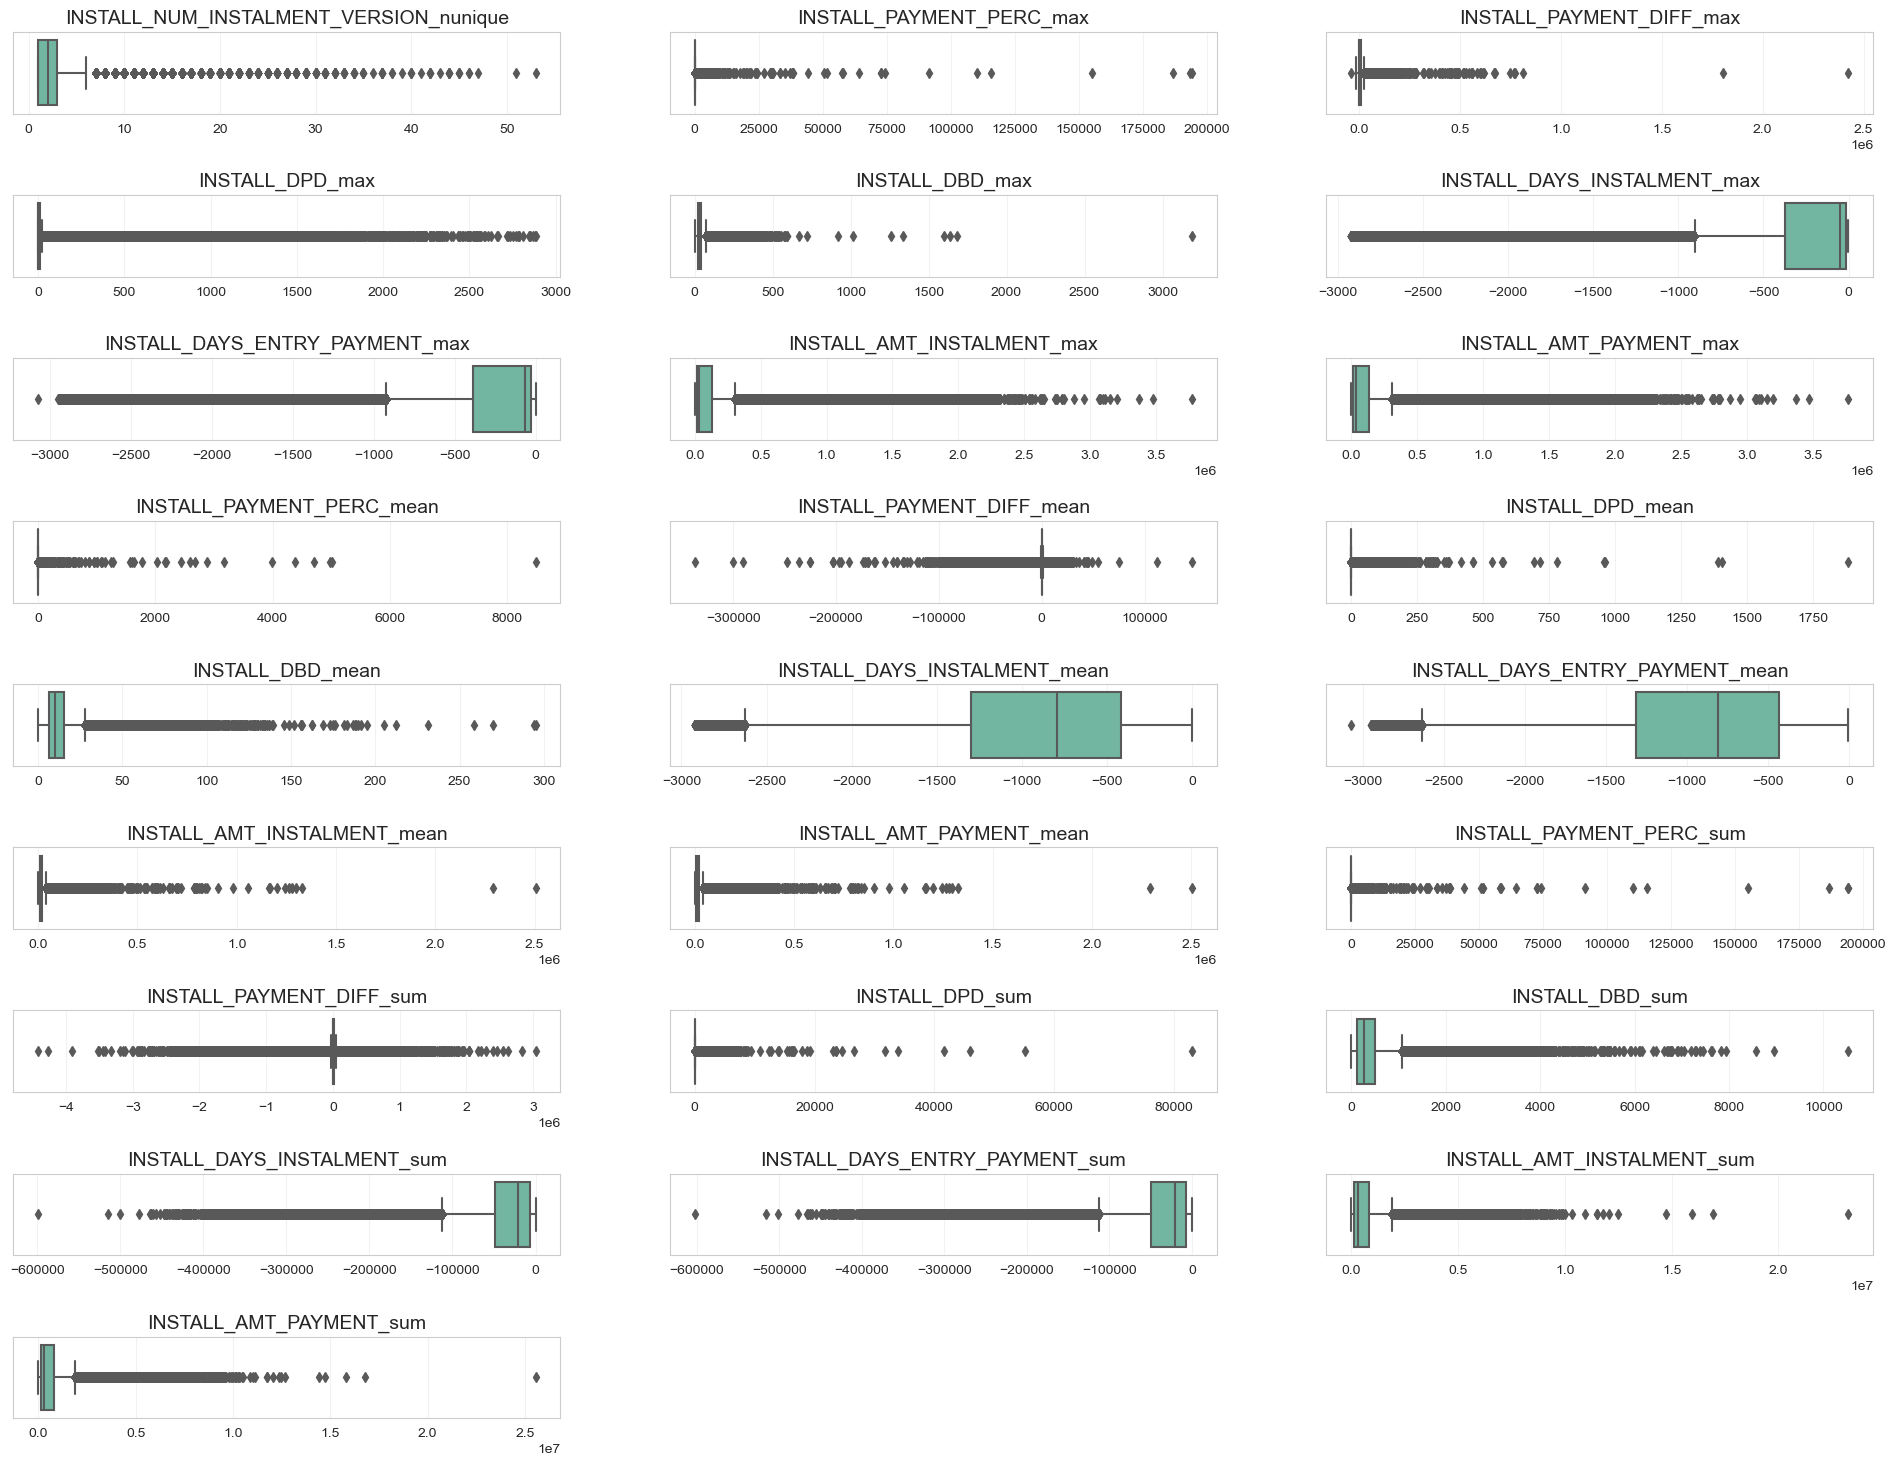

In [328]:
display_distribution(df_application[groupby_installments_agg_names])